## __Ghost Front__

__This script uses HUXt to simulate CME propagation through the interplanetay plane in order to explore the distortion of the leading edge. Using elongation angle of the nose and flank the idea of a ghost front is explored, as seen in Scott et al., 2019.__

__Obsevations from STEREO's HI cameras are compared to the elongation angles simulated in this model to develop our understanding on the physical features detected in 2D running differened imagery. Further analysis includes forecasting the arrivial time and speed of the leading edge at 1AU, and measuring the residual errors. Ensemble forcasting can be applied using the ambiguity in the estimated initial condition (originally gathered from spacecraft observations) to find minimum residual error of the CME's elongation profile.__

_(Lauren A. James)_
***
#### __Running this document__
There are many function written in this notebook that compute the results needed for the journal manuscript. The cells containing these functions need to be ran. Markdown text aobve these cells will inform the user to their basic funcationality.

***
***
***

#### __Import Libraries__


In [32]:
# Import libaries

import HUXt as H
import tables
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
import numpy as np
import pandas as pd
import os 
from astropy.time import Time, TimeDelta
from astropy.visualization import time_support
import scipy.stats as st
from scipy.interpolate import interp1d
import glob
import math
import sunpy.coordinates.sun as sn
import h5py
import ensemble as ens
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.lines as mlines


***
### __Solar Wind Speed Check__
This cell will produce figures that show:
1. Solar wind speed input at HUXt 30Rs inner boundary.
2. HUXt speed output at 30Rs for a 27 day model run.
3. MAS output at 30Rs for a 27 day model run.

(<Figure size 1008x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9453fdd2d0>)

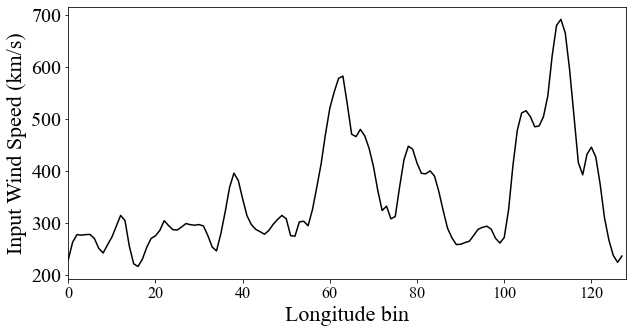

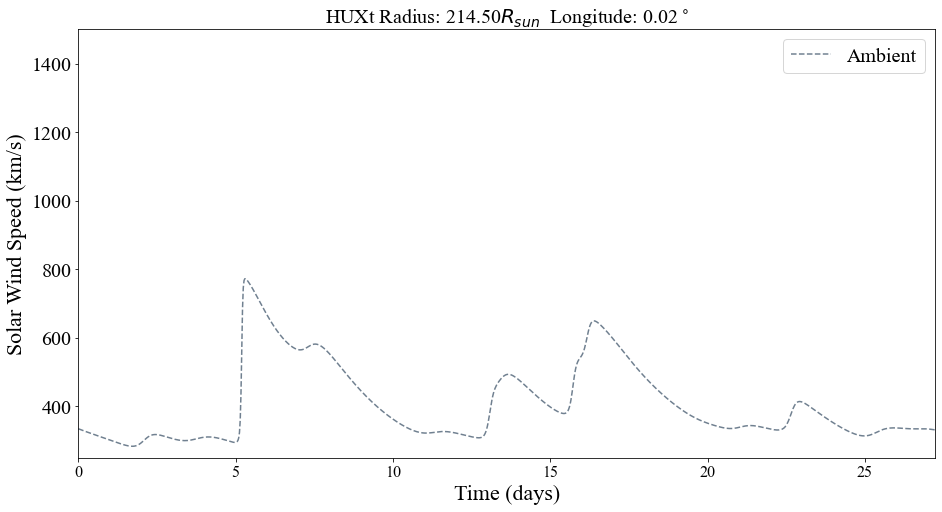

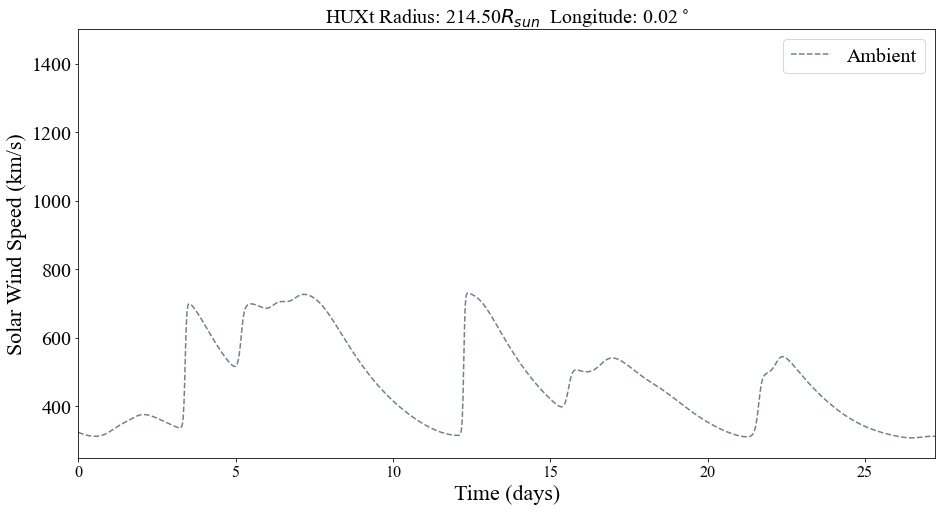

In [109]:
cme_list = []   # No CME in the model run
r = 1*u.AU

# BRaVDA inital speed array
v_boundary =np.flip([2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)

# 1) Solar wind speed at inner boundary of BRaVDA-HUXt
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(v_boundary,'k-')
ax.set_xlabel('Longitude bin')
ax.set_ylabel('Input Wind Speed (km/s)')
ax.set_xlim(0,128)

# 2) 1 au speed from BRaVDA-HUXt
model = H.HUXt(v_boundary=v_boundary, cr_num=2077, lon_out=0.0*u.deg, simtime=27.27*u.day, dt_scale=4)
model.solve(cme_list)
model.plot_timeseries(r, lon=0.0*u.deg,field='ambient')

# 3) 1 au speed from MAS-HUXt
model = H.HUXt(cr_num=2077, lon_out=0.0*u.deg, simtime=27.27*u.day, dt_scale=4)
model.solve(cme_list)
model.plot_timeseries(r, lon=0.0*u.deg,field='ambient',save=False,tag='init_sw')

***
# Part One
## **Single event run** 
*(i.e. deterministic)*

Set-up coronal mass ejection event and HUXt conditions. 
Solve the model, frame of propogation two-days into propogation, 5-day time series at Earth, and movie of propogation.

#### This sets up the HUXt run for BRaVDA-HUXt. 

The inner boundary is automatically set to 30Rs 

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7f9438c73510>)

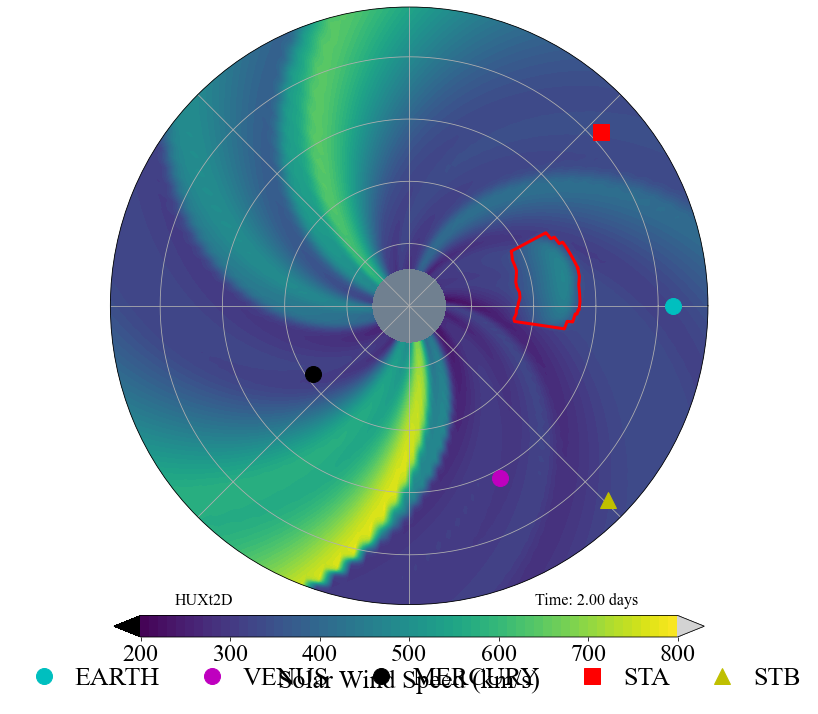

In [145]:
# Tag for file management. Event: 12 December 2008
event = '12Dec08_BRaVDA-HUXt_Deterministic'

# CME conditions
# Estimated from COR and HI observations.
t_launch = 0.0 * u.day
longitude = 10.0 * u.deg
latitude = 9.0 * u.deg
width = 42 * u .deg
v = 497 * (u.km/u.s)
thickness = 5 * u.solRad

# Solar wind at inner boundary
SW = [2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02]

# HUXt conditions
v_boundary = np.flip(SW, axis=0)* (u.km/u.s)
cr_num = 2077
cr_lon_init = 63.363 * u.deg 
simtime = 5 * u.day

cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude = latitude, width=width, v=v, thickness=thickness)
cme_list = [cme]
model = H.HUXt(v_boundary=v_boundary, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4)
model.solve(cme_list, save=False, tag=event)
model.plot(2*u.d, field='cme', save=False, tag=event)

### __Ghost Front application__
#### From here, we demostrate the use of ghost front theory (scott et al., 2019) in a HUXt model run.

#### __1. Load in HI observations__
***

Reads a csv file stored in \code into a dataframe and creates subset of data for each front identified. 


In [12]:
# Read in HI .csv files 

# STEREO-A
df_a = pd.read_csv(r"ghost_data_stereo_a_dec2008.csv")
                                                        # df_a = df_a.drop(columns=['Unnamed: 0'])
df_a['time'] = pd.to_datetime(df_a['time'])
                                                        # # Add error bar columns to dataframe
                                                        # df_a["el_lo_error"] = df_a["el"] - df_a["el_lo"]
                                                        # df_a["el_hi_error"] = df_a["el_hi"] - df_a["el"]

                                                        # # Create subset of dataframes for each front
                                                        # front1a_df = df_a[df_a['front'] == "Draw INNER front"]
                                                        # front2a_df = df_a[df_a['front'] == "Draw OUTER front"]
                                                        # front3a_df = df_a[df_a['front'] == "Draw THIRD front"]
                                                        # timeA_df = df_a['time'][df_a['front'] == "Draw INNER front"]

                                                        # # Delete columns that contain no new information
                                                        # front1a_df = front1a_df.drop(columns=['front'])
                                                        # front2a_df = front2a_df.drop(columns=['front'])
                                                        # front3a_df = front3a_df.drop(columns=['front'])

front1a = pd.DataFrame({'time':df_a['time'],'el':df_a['front1_el'],'el_lo_error':df_a['front1_el_lo'],
                           'el_hi_error':df_a['front1_el_hi']})
front2a = pd.DataFrame({'time':df_a['time'],'el':df_a['front2_el'],'el_lo_error':df_a['front2_el_lo'],
                           'el_hi_error':df_a['front2_el_hi']})
HItimeA = df_a['time']

# STEREO-B
df_b = pd.read_csv(r"HCME_B__20081212_01_pa_slice_264_degrees.csv")
df_b = df_b.drop(columns=['Unnamed: 0'])
df_b['time'] = pd.to_datetime(df_b['time'])
# Add error bar columns to dataframe
df_b["el_lo_error"] = df_b["el"] - df_b["el_lo"]
df_b["el_hi_error"] = df_b["el_hi"] - df_b["el"]

# Create subset of dataframes for each front
front1b = df_b[df_b['front'] == "Draw OUTER front"]
front2b = df_b[df_b['front'] == "Draw INNER front"]
front3b = df_b[df_b['front'] == "Draw THIRD front"]
HItimeB = df_b['time'][df_b['front'] == "Draw INNER front"]

# Delete columns that contain no new information
front1b = front1b.drop(columns=['front'])
front2b = front2b.drop(columns=['front'])
front3b = front3b.drop(columns=['front'])

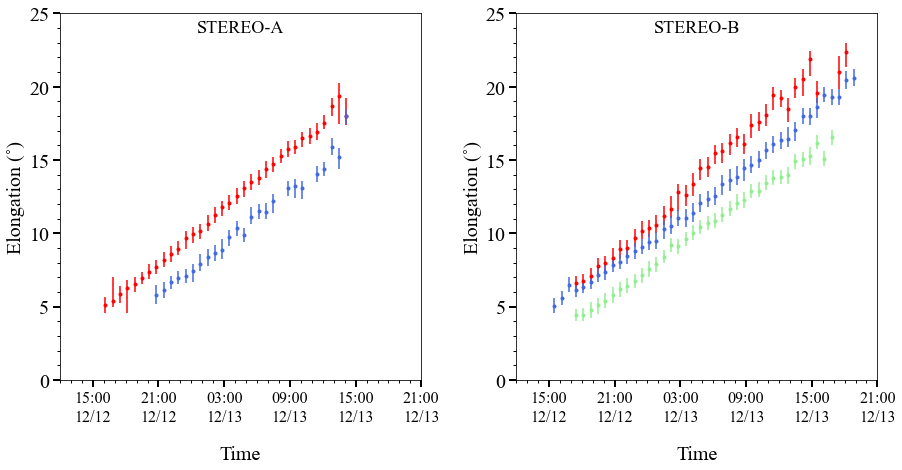

In [49]:
#Plot the HI observations
plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})

HItimeA = Time(HItimeA).datetime

# Plot figure
fig, ax = plt.subplots(1, 2, figsize = [13,7],sharex=True, sharey=False, constrained_layout=True)

for nn, axs in enumerate(ax):
#     locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
#     formatter = mdates.ConciseDateFormatter(locator)
#     axs.xaxis.set_major_locator(locator)
#     axs.xaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m/%d'))
    axs.xaxis.set_major_locator(mdates.HourLocator(interval=6))
    axs.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    axs.yaxis.set_major_locator(MultipleLocator(5))
    axs.yaxis.set_minor_locator(MultipleLocator(1))
    
    axs.tick_params(axis= 'y', which='major', direction="out", width=2, length=7)
    axs.tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
    axs.tick_params(axis= 'y', which='minor', direction="out", width=1, length=3)
    axs.tick_params(axis= 'x', which='minor', direction="out", width=1, length=3)

    
# ax[0].set_title('STEREO-A')
ax[0].set_xlabel('Time', labelpad=20)
ax[0].set_ylabel('Elongation (˚)')
ax[0].set_ylim(top=25, bottom=0)                                 
ax[0].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,
               Time('2008-12-13T21:00:00',format='isot').datetime)                               # Change to time
ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),
            fmt='.',color='red', label='HI-1 front 1')
ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']),
            fmt='.',color='royalblue', label='HI-1 front 2')


# ax[1].set_title('STEREO-B')
ax[1].set_xlabel('Time', labelpad=20)
ax[1].set_ylabel('Elongation (˚)')
ax[1].set_ylim(top=25, bottom=0)                                 
ax[1].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,
               Time('2008-12-13T21:00:00',format='isot').datetime)
ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']),
             fmt='.',color='red', label='HI-1 front 1 (OUTER)')
ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),
             fmt='.',color='royalblue', label='HI-1 front 2 (INNER)')
ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']),
             fmt='.',color='lightgreen', label='HI-1 front 3')

#axB.legend(loc='best', bbox_to_anchor=[1.6,0.5])
# ax[1].legend(loc=[1.1,0.35], frameon=False)


ax[0].annotate("STEREO-A", xy=(0.5, 0.95), ha='center' ,xycoords="axes fraction", fontsize=18)
ax[1].annotate("STEREO-B", xy=(0.5, 0.95), ha='center' ,xycoords="axes fraction", fontsize=18)
fig.tight_layout()
fig.show()

filename = "HUXt_CR{:03d}_{}_HI-1_fronts.png".format(cr_num,'12Dec08')
filepath = os.path.join(model._figure_dir_, filename)            
fig.savefig(filepath,dpi=300, bbox_inches='tight')

filename = "HUXt_CR{:03d}_{}_HI-1_fronts.pdf".format(cr_num,'12Dec08')
filepath = os.path.join(model._figure_dir_, filename)            
fig.savefig(filepath,dpi=300, bbox_inches='tight')

#### __2. Calculating elongation angle at each model timestep__
***
* Defintion ***huxt_t_e_profile_fast(cme)*** will create the time elongation profiles of the nose and flank as seen from the observer "STEREO-A" and "STEREO-B". It is based off the original HUXt function.



In [14]:
# Calculate elongation angle at each model timestep.
def huxt_t_e_profile_fast(cme):
    """
    This is based off the original HUXt function. Now, the identifcation of the nose and the secondary flank has been included.
    
    "Compute the time elongation profile of the flank of a ConeCME in HUXt, from both the STEREO-A or STEREO-B
    perspective. A faster, but less reliable, version of computing the CME flank with huxt_t_e_profile. Rather than
    using stereo_spice for the full calculation, which is a bit slow, this function does it's own calculation of the
    flank elongation, and then uses stereo_spice to compute the flank position angle. This might fail for some
    geometries where the elongation is technically larger along PA angles not visible to either STA or STB. However,
    this agrees with huxt_t_e_profile for the deterministic runs, so I think is safe for the events in this study.
    Parameters
    ----------
    cme: A ConeCME object from a completed HUXt run (i.e the ConeCME.coords dictionary has been populated).
    Returns
    -------
    sta_profile: Pandas dataframe giving the coordinates of the ConeCME flank from STA's perspective, including the
                time, elongation, position angle, and HEEQ radius and longitude.
    stb_profile: Pandas dataframe giving the coordinates of the ConeCME flank from STB's perspective, including the
                time, elongation, position angle, and HEEQ radius and longitude."" 
    """
    # Gather information of body positions at each timestep
    earth = model.get_observer('earth')
    sta = model.get_observer('sta')
    stb = model.get_observer('stb')

    # Create dataframe for storing the elogation profiles 
    sta_profile = pd.DataFrame(index=np.arange(earth.time.size), columns=['time', 'lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank'])
    stb_profile = pd.DataFrame(index=np.arange(earth.time.size), columns=['time', 'lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank'])
    # format time 
    sta_profile['time'] = sta.time.jd
    stb_profile['time'] = stb.time.jd

    # Loop through all the boundary cooridinate points to work out the elongation angle from both STEREO-A and STEREO-B point of view
    for i, coord in cme.coords.items():

            if len(coord['r'])==0:
                continue

            r_sta = sta.r[i]
            x_sta = sta.r[i] * np.cos(sta.lat[i]) * np.cos(sta.lon[i])
            y_sta = sta.r[i] * np.cos(sta.lat[i]) * np.sin(sta.lon[i])
            z_sta = sta.r[i] * np.sin(sta.lat[i])

            r_stb = stb.r[i]
            x_stb = stb.r[i] * np.cos(stb.lat[i]) * np.cos(stb.lon[i])
            y_stb = stb.r[i] * np.cos(stb.lat[i]) * np.sin(stb.lon[i])
            z_stb = stb.r[i] * np.sin(stb.lat[i])

            lon_cme = coord['lon']
            lat_cme = 0 * u.deg
            r_cme = coord['r']

            x_cme = r_cme * np.cos(lat_cme) * np.cos(lon_cme)
            y_cme = r_cme * np.cos(lat_cme) * np.sin(lon_cme)
            z_cme = r_cme * np.sin(lat_cme)
            #############
            # Compute the observer CME distance, S, and elongation

            x_cme_s = x_cme - x_sta
            y_cme_s = y_cme - y_sta
            z_cme_s = z_cme - z_sta
            s = np.sqrt(x_cme_s**2 + y_cme_s**2 + z_cme_s**2)

            numer = (r_sta**2 + s**2 -r_cme**2).value
            denom = (2.0 * r_sta * s).value
            e_sta_list  = np.arccos(numer / denom )

            x_cme_s = x_cme - x_stb
            y_cme_s = y_cme - y_stb
            z_cme_s = z_cme - z_stb
            s = np.sqrt(x_cme_s**2 + y_cme_s**2 + z_cme_s**2)

            numer = (r_stb**2 + s**2 -r_cme**2).value
            denom = (2.0 * r_stb * s).value
            e_stb_list  = np.arccos(numer / denom )

            # Find the flank coordinate
            id_sta_flank = np.argmax(e_sta_list)
            id_stb_flank = np.argmax(e_stb_list)

            e_sta = e_sta_list[id_sta_flank]
            e_stb = e_stb_list[id_stb_flank]

            sta_profile.loc[i, 'lon'] = lon_cme[id_sta_flank].value
            sta_profile.loc[i, 'r'] = r_cme[id_sta_flank].value
            sta_profile.loc[i, 'el'] = np.rad2deg(e_sta)

            stb_profile.loc[i, 'lon'] = lon_cme[id_stb_flank].value
            stb_profile.loc[i, 'r'] = r_cme[id_stb_flank].value
            stb_profile.loc[i, 'el'] = np.rad2deg(e_stb)

            # Find the nose coordinate (inc. identifying the front of the CME)
            lon_error = lon_cme.value - cme.longitude.value

            # Ensuring the correct boundary point is identifed for the nose by 1)sorting the error list in ascending order then 2)by using
            # the radius, ensuring the boundary point is on the leading edge of the CME rather than the back end of the event.
            # Here we use a radius difference greater than 10% to identify the boundary point is not on the front edge.
            idx = np.argsort(abs(lon_error)) 
            if r_cme[idx[0]] < r_cme[idx[1]]*0.9:
                id_nose = idx[1]
            # in the case in which three boundary points are identified to have nose like longtudinal errors, take the point with greastest radius 
            elif r_cme[idx[1]] < r_cme[idx[2]]*0.9 and r_cme[idx[0]] < r_cme[idx[2]]*0.9:      
                id_nose = idx[2]
            else:
                id_nose = idx[0]
            
            e_sta_nose = e_sta_list[id_nose]
            e_stb_nose = e_stb_list[id_nose]

            sta_profile.loc[i, 'lon_n'] = lon_cme[id_nose].value
            sta_profile.loc[i, 'r_n'] = r_cme[id_nose].value
            sta_profile.loc[i, 'el_n'] = np.rad2deg(e_sta_nose)

            stb_profile.loc[i, 'lon_n'] = lon_cme[id_nose].value
            stb_profile.loc[i, 'r_n'] = r_cme[id_nose].value
            stb_profile.loc[i, 'el_n'] = np.rad2deg(e_stb_nose)

            # Find the secondary flank coordinate 
            e_sta = e_sta_list[id_stb_flank]
            e_stb = e_stb_list[id_sta_flank]

            sta_profile.loc[i, 'lon_sec_flank'] = lon_cme[id_stb_flank].value
            sta_profile.loc[i, 'r_sec_flank'] = r_cme[id_stb_flank].value
            sta_profile.loc[i, 'el_sec_flank'] = np.rad2deg(e_sta)

            stb_profile.loc[i, 'lon_sec_flank'] = lon_cme[id_sta_flank].value
            stb_profile.loc[i, 'r_sec_flank'] = r_cme[id_sta_flank].value
            stb_profile.loc[i, 'el_sec_flank'] = np.rad2deg(e_stb)

    keys = ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']
    sta_profile[keys] = sta_profile[keys].astype(np.float64)

    keys = ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']
    stb_profile[keys] = stb_profile[keys].astype(np.float64)
            
    return sta_profile, stb_profile

In [146]:
sta_profile, stb_profile = huxt_t_e_profile_fast(cme)

#### __3. Plot elongation-time profiles__
***
* Below is a defintion ***elongation_plot_temp*** that will overlay the time-elongation profiles of the nose and flank on top of the HI observations

    

In [148]:
def elongation_plot_temp(cme,FOV,orientation="landscape",thirdfront=False, save=False, tag=''):
    """
    THIS VARIATION HAS ADJUSTED THE PLOTTING FORMAT FOR PUBLICATION
    
    Plot elongation-time profiles from STEREO POV, inc HI observations.
    Paramaters
    FOV: either 'HI1' or 'HI2'
    save: if Ture, figure is saved to files
    tag: tag for file names
    
    Return:
    A 2x1 plot of the elongation-time profile for all the features from the viewpoint of 1) STEREO-A and 2) STEREO-B
    """
   
    # Create profile
    sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
    
    # Find plotting limits
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(sta_profile)):
            if sta_profile.el_n[i] < 30:
                FOVlimit_a = i
            if stb_profile.el_n[i] < 30:
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(sta_profile.el)
        FOVlimit_a = len(sta_profile)
        FOVlimit_b = len(stb_profile)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
    # this may need a try command.    

    # Format time  -  Here I am using the output from the model.getobserver() command. Would be simplier if I used sta_profile.time
                                                                        #     time_a = sta.time.to_value('datetime')[0:FOVlimit_a]
                                                                        #     time_b = stb.time.to_value('datetime')[0:FOVlimit_b]
    time_a = Time(sta_profile.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(stb_profile.time, format = 'jd').datetime[0:FOVlimit_b]

    
    # Plot figure

    plt.rcParams.update({'font.size': 22, 'axes.labelsize':26, 'legend.fontsize':26, 'xtick.labelsize': 24.0, 'ytick.labelsize': 24.0, "font.family":"Times New Roman"})

    # Set Orientation of figure
    if orientation == "landscape":
        fig, ax = plt.subplots(1,2, figsize = [11,8], sharex=False, sharey=True)
    elif orientation == "portrait": 
        fig, ax = plt.subplots(2,1, figsize = [7,15], sharex=True, sharey=False,)
    else:
        print('Figure orientation needs to be "landscape" or "portrait".')
        
    # Set plot axis
    for nn,axs in enumerate(ax):
            axs.yaxis.set_major_locator(MultipleLocator(5))
            axs.yaxis.set_minor_locator(MultipleLocator(1))
            
            axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m/%d'))
            axs.xaxis.set_major_locator(mdates.HourLocator(interval=12))
            axs.xaxis.set_minor_locator(mdates.HourLocator(interval=3))
    
            axs.set_xlabel('Time')
            axs.set_ylim(top=ymax) 
            axs.set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,Time('2008-12-13T21:00:00', format='isot').datetime)
    
    ax[0].set_title('STEREO-A')
    ax[0].set_ylabel('Elongation (˚)')   
    ax[0].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,Time('2008-12-13T21:00:00', format='isot').datetime)
    ax[1].set_title('STEREO-B')
    plt.setp(ax[1].get_yticklabels(), visible=False)
    
    ax[0].tick_params(axis= 'y', which='major', direction="inout", width=2, length=7)
    ax[0].tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
    ax[0].tick_params(axis= 'y', which='minor', direction="inout", width=1, length=7)
    ax[0].tick_params(axis= 'x', which='minor', direction="out", width=1, length=7)
    
    ax[1].tick_params(axis= 'y', which='major', direction="in", width=2, length=7)
    ax[1].tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
    ax[1].tick_params(axis= 'y', which='minor', direction="in", width=1, length=7)
    ax[1].tick_params(axis= 'x', which='minor', direction="out", width=1, length=7)
    
    # Plot figures
    ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']), fmt='.',color='red', alpha=0.7)
    ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.',color='blue', alpha=0.7)
    ax[0].plot(time_a, sta_profile.el[0:FOVlimit_a],'k', lw=2)
    ax[0].plot(time_a, sta_profile.el_n[0:FOVlimit_a], 'k--', lw=2)

    ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.',color='red', alpha=0.7, label='HI-1 Outer Front')
    ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']), fmt='.',color='blue', alpha=0.7, label='HI-1 Inner Front')
    ax[1].plot(time_b, stb_profile.el[0:FOVlimit_b], 'k', label='Flank', lw=2)
    ax[1].plot(time_b, stb_profile.el_n[0:FOVlimit_b], 'k--', label='Nose', lw=2)
    if thirdfront == True:
        ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']), fmt='.',color='green', alpha=0.7, label='HI-1 front 3')
        
    # More figure adjustmemts
    fig.legend(bbox_to_anchor=(0.5, 0.06), loc='center', ncol=3, frameon=False)
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.3, hspace=0.4, wspace=0.0)

    if save:
        cr_num = np.int32(model.cr_num.value)
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile.png".format(cr_num, tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile.pdf".format(cr_num, tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        
    plt.show()
        
    return


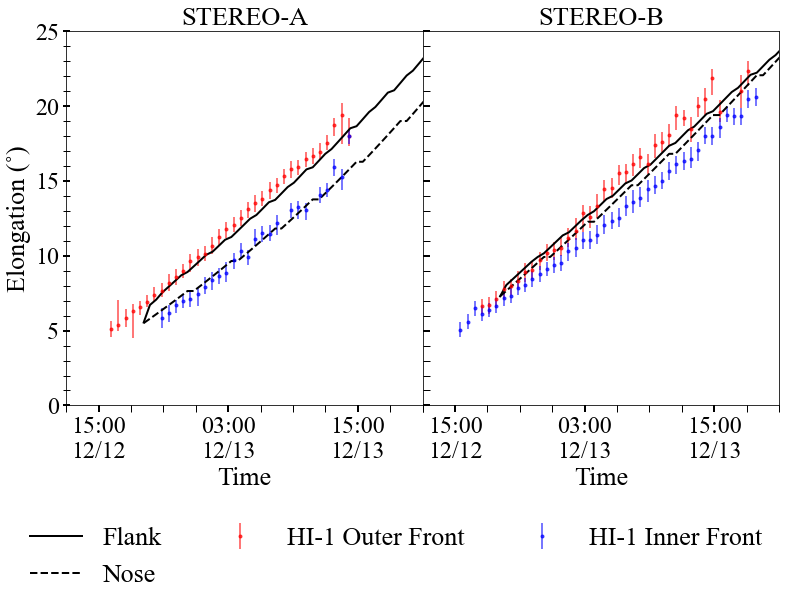

In [150]:
elongation_plot_temp(cme,'HI1', "landscape", thirdfront=False, save=False, tag=event)

#### __4. Calculate arrival time at speed at L1__
***
Define a funtion to compute the arrivial time and speed of the CME leading edge at Earth. For persision, these values are interpreted, therefore, as plot shows the model's timeseries at Earth along with the point of leading edge arrival to ensure the value is fesible.
      


In [20]:
 def compute_earth_arrival(self, print_values=False, plot=False):
        """
        Function to compute arrival time at a set longitude and radius of the CME front.
        Tracks radial distance of front along a given longitude out past specified longitude.
        Then interpolates the r-t profile to find t_arr at arr_rad. And now this does the same for speed.
        
        Returns the transit time, arrival time, and arrival speed of the leading edge at Earth.
        If plot, returns a timeseries of the CME propogation that indicated the point of arrivial
        """

        # Uses elongation-profile to assign the time at which Earth's location is be calculated
                                                                    #times = Time([coord['time'] for i, coord in self.coords.items()])
        times = Time(sta_profile.time, format = 'jd')                
        ert = H.Observer('EARTH', times)
        
        # Need to force units to be the same to make interpolations work 
        arr_lon = 0*u.rad
        arr_rad = np.mean(ert.r)
        
        # Check if hit or miss.
        # Put longitude between -180 - 180, centered on CME lon.
        lon_diff = arr_lon - self.longitude
        if lon_diff < -180*u.deg:
            lon_diff += 360*u.deg
        elif lon_diff > 180*u.deg:
            lon_diff -= 360*u.deg
            
        cme_hw = self.width/2.0
        if (lon_diff >= -cme_hw) & (lon_diff <= cme_hw):
            # HIT, so get t-r profile along lon of interest.
            t_front = []
            r_front = []
            v_front = []
            
            # earth
#             radius = 1.0 * u.au 
#             lon = 0.0 * u.deg
            
            # ACE
            radius = (1.0 * u.au) - (1400000 * u.km) 
            lon = 0.0 * u.deg
            id_r = np.argmin(np.abs(model.r - radius))
            id_lon = np.argmin(np.abs(model.lon - lon))

            for i, coord in self.coords.items():
                               
                if len(coord['r'])==0:
                    continue

                #t_front.append(coord['model_time'].to('d').value)
                t_front.append(model.time_out[i].to(u.day).value)       # different to Luke's version
                v_front.append(model.v_grid_cme[i,id_r,id_lon].value)

                # Lookup radial coord at earth lon
                r = coord['r'].value
                lon = coord['lon'].value

                # Only keep front of cme
                id_front = r > np.mean(r)
                r = r[id_front]
                lon = lon[id_front]

                r_ans = np.interp(arr_lon.value, lon, r, period=2*np.pi)
                r_front.append(r_ans)
                # Stop when max r 
                if r_ans > arr_rad.value:
                    break

            t_front = np.array(t_front)
            r_front = np.array(r_front)
            v_front = np.array(v_front)
            try:
                t_transit = np.interp(arr_rad.value, r_front, t_front)
                self.earth_transit_time = t_transit * u.d
#                 self.earth_arrival_time = times[0] + self.earth_transit_time
                self.earth_arrival_time = model.time_init + self.earth_transit_time
                v_atarrivial = np.interp(arr_rad.value, r_front, v_front)
                self.earth_arrival_speed = v_atarrivial * u.km/u.s
            except:
                self.earth_transit_time = np.NaN*u.d
                self.earth_arrival_time = Time('0000-01-01T00:00:00')
                self.earth_arrival_speed = np.NaN *u.km/u.s
        else:
            self.earth_transit_time = np.NaN*u.d
            self.earth_arrival_time = Time('0000-01-01T00:00:00')
            self.earth_arrival_speed = np.NaN *u.km/u.s
        
        if print_values:
            print("Model inital time: ", model.time_init.iso)
            print("Leading edge transit time:", "%.4f" %self.earth_transit_time.value *u.d)
            print("Leading edge arrival time at Earth:", self.earth_arrival_time.iso)
            print("Leading edge arrival speed at Earth:", "%.4f" %self.earth_arrival_speed.value *u.km/u.s)
        
        if plot:
            model.plot_timeseries(1.0*u.AU, lon=0.0*u.deg,field='both', save=True, tag='1d_cone_test_radial')
            plt.plot(self.earth_transit_time,self.earth_arrival_speed,'rx',label="Leading Edge Arrival")
            plt.legend()
        return
    


In [53]:
compute_earth_arrival(cme, print_values=True, plot=False)

Model inital time:  2008-12-12 19:09:53.490
Leading edge transit time: 3.5296 d
Leading edge arrival time at Earth: 2008-12-16 07:52:30.316
Leading edge arrival speed at Earth: 353.394 km / s



#### __5. Error between model and observations__
***

Functions to calculate the error between the model time-elongation profiles and the HI1 observations are below.

* ***calculate_error_new*** calculates the error between the model and HI oberservation, per observation. 
* ***deterministic_error*** returns the error for the model run, and plots figures


In [42]:
def calculate_error_new(sta_profile, stb_profile):
    """
    This will calcuate the total residual error and RMSE of the model run in comparions to the 
    HI observations. To do this, the model results are interpolated to have the same time-stamp
    as the observations. 
    Params:
    --------
    sta_profile: The elongation profile of the features as seen from STEREO-A
    stb_profile: The elongation profile of the features as seen from STEREO-B
    
    Return:
    --------
    ts_errorA: Dataframe of the error at each HI timestep from STEREO-A
    ts_errorB: Dataframe of the error at each HI timestep from STEREO-B
    errorA: Dataframe of model run error, showing total error and RMSE of nose, flank, and combined profiles from STEREO-A
    errorB: Dataframe of model run error, showing total error and RMSE of nose, flank, and combined profiles from STEREO-A
    """
    # Check for HI data. Ensure it has been read in.
    
    # create dataframes to store error information for each timestep
    ts_errorA = pd.DataFrame()
    ts_errorB = pd.DataFrame()
    
    # create dataframes to store error information for the whole model run
    errorA = pd.DataFrame()
    errorB = pd.DataFrame()
    
    # interpret model values to have the same timestep as the HI observations
    # np.interp(x: where to interp., xp: x-coord. points of data, fp: y-coord. point of data)
    timeA = Time(HItimeA)
    interp_elA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el'], left=float("NaN"), right=float("NaN"))
    interp_el_nA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el_n'], left=float("NaN"), right=float("NaN"))
    
    timeB = Time(front1b.time)
    interp_elB = np.interp(timeB.jd, stb_profile['time'], stb_profile['el'], left=float("NaN"), right=float("NaN"))
    interp_el_nB = np.interp(timeB.jd, stb_profile['time'], stb_profile['el_n'], left=float("NaN"), right=float("NaN"))
    interp_el_sec_flankB = np.interp(timeB.jd, stb_profile['time'], stb_profile['el_sec_flank'], left=float("NaN"), right=float("NaN"))
    
    # Make interpolated values NaN when obs. angle is NaN. This is to ensure residual error is calculated using the right values.
    frt1a=front1a.el.tolist()
    for i in range(len(frt1a)):
        if math.isnan(frt1a[i]):
            interp_elA[i] = float('NaN')

    frt2a=front2a.el.tolist()
    for i in range(len(frt2a)):
        if math.isnan(frt2a[i]):
            interp_el_nA[i] = float('NaN')
            
    frt1b=front1b.el.tolist()
    for i in range(len(frt1b)):
        if math.isnan(frt1b[i]):
            interp_elB[i] = float('NaN')

    frt2b=front2b.el.tolist()
    for i in range(len(frt2b)):
        if math.isnan(frt2b[i]):
            interp_el_nB[i] = float('NaN')

    frt3b=front3b.el.tolist()
    for i in range(len(frt3b)):
        if math.isnan(frt3b[i]):
            interp_el_sec_flankB[i] = float('NaN')
            
    # Save to timestep dataframe
    ts_errorA['time'] = timeA
    ts_errorA['obs flank'] = front1a.el
    ts_errorA['interp flank'] = interp_elA
    ts_errorA['R2 flank'] = (ts_errorA['obs flank'] - ts_errorA['interp flank'])**2
    ts_errorA['obs nose'] = front2a.el
    ts_errorA['interp nose'] = interp_el_nA
    ts_errorA['R2 nose'] = (ts_errorA['obs nose'] - ts_errorA['interp nose'])**2
   
    #residualB['time'] = front1b.time
    ts_errorB['time'] = front1b.time
    ts_errorB['obs flank'] = front1b.el
    ts_errorB['interp flank'] = interp_elB
    ts_errorB['R2 flank'] = (ts_errorB['obs flank'] - ts_errorB['interp flank'])**2
    ts_errorB['obs nose'] = frt2b
    ts_errorB['interp nose'] = interp_el_nB
    ts_errorB['R2 nose'] = (ts_errorB['obs nose'] - ts_errorB['interp nose'])**2
    ts_errorB['obs sec flank'] = frt3b
    ts_errorB['interp sec flank'] = interp_el_sec_flankB
    ts_errorB['R2 sec flank'] = (ts_errorB['obs sec flank'] - ts_errorB['interp sec flank'])**2

# Calculate the RMSE error of the model run
    
    # Sum of residual squared  error 
    tot_R2_flankA = np.nansum(ts_errorA['R2 flank'] )
    tot_R2_noseA = np.nansum(ts_errorA['R2 nose'] )
    #tot_R2_sec_flankA = np.nansum(R2_sec_flankA)
    tot_R2_two_featuresA =  tot_R2_flankA +  tot_R2_noseA 

    tot_R2_flankB = np.nansum(ts_errorB['R2 flank'])
    tot_R2_noseB = np.nansum(ts_errorB['R2 nose'])
    tot_R2_sec_flankB = np.nansum(ts_errorB['R2 sec flank'])
    tot_R2_two_featuresB = tot_R2_flankB +  tot_R2_noseB

    # Average residual for the run
    avg_error_flankA = tot_R2_flankA / (ts_errorA["interp flank"].count())
    avg_error_noseA = tot_R2_noseA / (ts_errorA["interp nose"].count())
    datacountA = ts_errorA["interp flank"].count()+ts_errorA["interp nose"].count()
    avg_error_two_featuresA = tot_R2_two_featuresA / datacountA
    
    avg_error_flankB = tot_R2_flankB / (ts_errorB["interp flank"].count())
    avg_error_noseB = tot_R2_noseB / (ts_errorB["interp nose"].count())
    avg_error_sec_flankB = tot_R2_sec_flankB / (ts_errorB["interp sec flank"].count())
    datacountB = ts_errorB["interp flank"].count()+ts_errorB["interp nose"].count()
    avg_error_two_featuresB = tot_R2_two_featuresB / datacountB
    
    # Square root of  average for the run
    rmse_flankA = np.sqrt(avg_error_flankA)
    rmse_noseA = np.sqrt(avg_error_noseA)
    rmse_two_featuresA = np.sqrt(avg_error_two_featuresA)
    
    rmse_flankB = np.sqrt(avg_error_flankB)
    rmse_noseB = np.sqrt(avg_error_noseB)
    rmse_sec_flankB = np.sqrt(avg_error_sec_flankB)
    rmse_two_featuresB = np.sqrt(avg_error_two_featuresB)

    # Combining the RMSE for the whole run
    totalerror = tot_R2_two_featuresA + tot_R2_two_featuresB
    datacount = datacountA + datacountB
    rmse_combined = np.sqrt(totalerror/datacount)
                                                             
    # Store error values for whole model run in dataframe
    errorA = errorA.append({'flank':tot_R2_flankA, 
                            'nose':tot_R2_noseA,
                            'N & F': tot_R2_two_featuresA,
                            'RMSE flank': rmse_flankA, 
                            'RMSE nose': rmse_noseA,
                            'RMSE N & F': rmse_two_featuresA}, ignore_index=True)
    
    errorB = errorB.append({'flank':tot_R2_flankB, 
                            'nose':tot_R2_noseB, 
                            'sec flank': tot_R2_sec_flankB,
                            'N & F': tot_R2_two_featuresB,
                            'RMSE flank': rmse_flankB, 
                            'RMSE nose': rmse_noseB, 
                            'RMSE sec flank': rmse_sec_flankB,
                            'RMSE N & F': rmse_two_featuresB}, ignore_index=True)

    return ts_errorA, ts_errorB, errorA, errorB


In [151]:
def deterministic_error(cme,print_RMSE=True, plot=False, save=False):
    """
    This will calculate the error for the whole model run for the time-elongation profiles of the
    nose, flank, and the nose and flank combined. The error from both spacecraft sepearatly is
    calculated. The combined error of the nose and flank from both spacecraft is also found. This
    is the model run error.
    
    Params:
    --------
    cme:
    print_RMSE: display the error dataframes
    plot: display two plots. (1) the model elongation against the observed elongation at each observation timestamp. 
            (2) The variation of error with each timestamp. 
    save: Save figure locally in \figure directory
    
    Return:
    --------
    errorA: Dataframe of model run error, showing total error and RMSE of nose, flank, and combined profiles from STEREO-A
    errorB: Dataframe of model run error, showing total error and RMSE of nose, flank, and combined profiles from STEREO-A
    
    """
    # Find the elongation profiles for the model run
    sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
    
    # Find the error of the model run
    ts_errorA, ts_errorB, errorA, errorB = calculate_error_new(sta_profile, stb_profile)
    
    if print_RMSE:
        display(errorA, errorB)
            
    if plot:
        # Plot a figure of the interp. values and the HI obs.
        fig, ((axA,axB)) = plt.subplots(1, 2, figsize = [15,6])
        
        axA.errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']), fmt='.',color='pink', label='HI-1 front 1')
        axA.errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.',color='skyblue', label='HI-1 front 2')
        axA.plot(HItimeA, ts_errorA['interp flank'], 'rx', label='flank')
        axA.plot(HItimeA, ts_errorA['interp nose'], 'bx', label='nose')
        axA.set_title('STEREO-A')
        axA.set_xlabel('Time', labelpad=30)
        
        timeB = front1b.time
        axB.errorbar(timeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.',color='pink', label='HI-1 front 1 (OUTER)')
        axB.errorbar(timeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']), fmt='.',color='skyblue', label='HI-1 front 2 (INNER)')
        axB.plot(timeB, ts_errorB['interp flank'], 'rx', label='flank')
        axB.plot(timeB, ts_errorB['interp nose'], 'bx', label='nose')
        axB.set_title('STEREO-B')
        axB.set_xlabel('Time', labelpad=30)
        
        axA.set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
        axB.set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
        
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=60) 
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=60)   
        axB.legend(loc=[1.1,0.35], frameon=False)
        
        plt.show()
        #=================
        #Plot figure of the residual squared error with time
        
        fig, ((axA,axB)) = plt.subplots(1, 2, figsize = [15,6])
                                                                                                                                                  
        axA.set_title('STEREO-A')
        axA.set_xlabel('Time', labelpad=30)
        axA.set_ylabel('$Residual^ 2$')
        axA.plot(HItimeA, ts_errorA['R2 flank'],'r-', label = "Flank")
        axA.plot(HItimeA, ts_errorA['R2 nose'],'b-', label= "Nose")
        axA.set_yticks(np.arange(0, 8, 1))

        axB.set_title('STEREO-B')
        axB.set_xlabel('Time', labelpad=30)
        axB.set_ylabel('$Residual^ 2$')
        axB.plot(timeB, ts_errorB['R2 flank'],'r-', label = "Flank")
        axB.plot(timeB, ts_errorB['R2 nose'],'b-', label= "Nose")
        axB.set_yticks(np.arange(0, 8, 1))
        
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=60) 
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=60) 
        axB.legend(loc=[1.1,0.35], frameon=False)

        fig.tight_layout()
        
    return errorA, errorB 
    

,N & F,RMSE N & F,RMSE flank,RMSE nose,flank,nose
0,25.269747,0.684075,0.726324,0.631535,15.298851,9.970896


,N & F,RMSE N & F,RMSE flank,RMSE nose,RMSE sec flank,flank,nose,sec flank
0,59.535924,0.928892,0.807255,1.027823,0.87559,21.504812,38.031112,25.299725


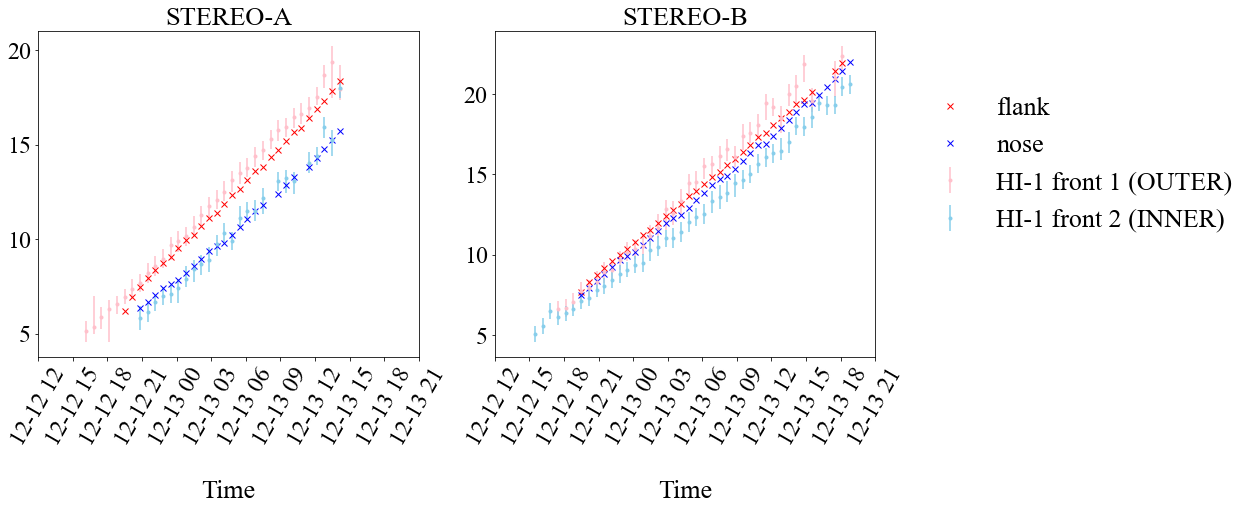

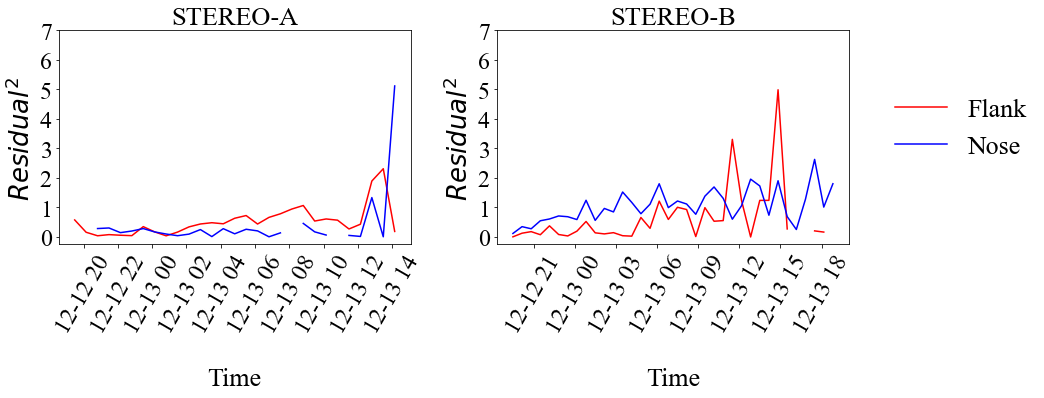

In [153]:
errorA, errorB = deterministic_error(cme, print_RMSE=True, plot=True, save=False)

***
### We can also use solar wind speed from MAS, saved as an inner boundary condition in the depostity. ###

Warning, multiple matches found, selecting match with greatest target overlap


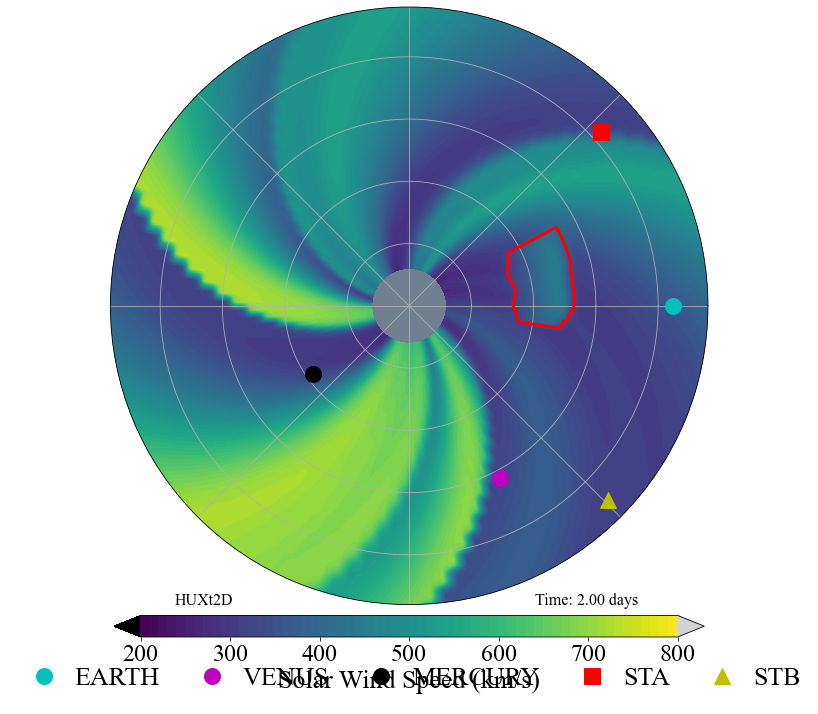

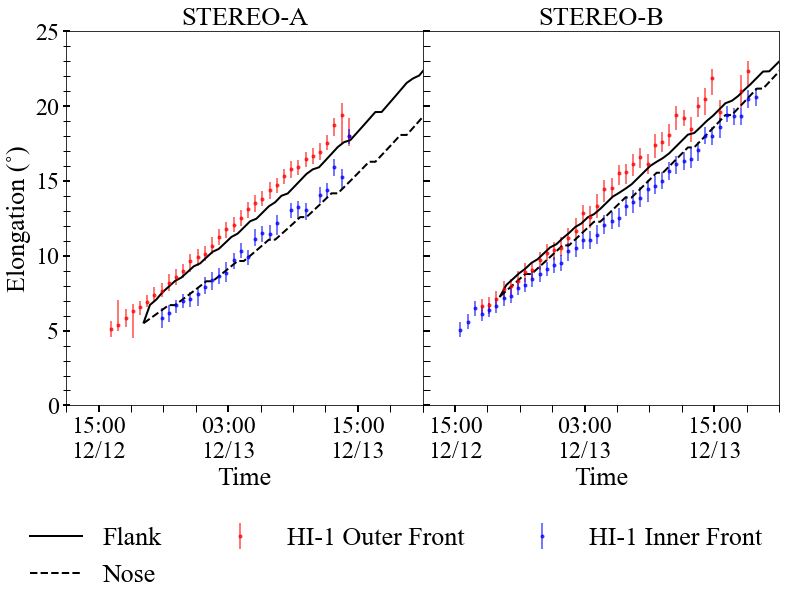

Model inital time:  2008-12-12 19:09:53.490
Leading edge transit time: 3.722 d
Leading edge arrival time at Earth: 2008-12-16 12:29:34.121
Leading edge arrival speed at Earth: 328.041 km / s


,N & F,RMSE N & F,RMSE flank,RMSE nose,flank,nose
0,45.035069,0.913227,0.92535,0.898958,24.831931,20.203138


,N & F,RMSE N & F,RMSE flank,RMSE nose,RMSE sec flank,flank,nose,sec flank
0,45.111634,0.808574,0.994702,0.588321,0.898568,32.651253,12.460381,26.644997


In [135]:
# Set up model using MAS
tag="12Dec2008_MAS-HUXt_Determinsitc"

# By assigning cr_num and cr_lon_init, the MAS solar wind solution is retrived
model = H.HUXt(cr_num=2077, cr_lon_init=63.363*u.deg, simtime=6*u.day, dt_scale=4)
cme = H.ConeCME(t_launch=0.0*u.day, latitude = 9.0*u.deg, longitude=10.0*u.deg, width=42*u.deg, v=497*(u.km/u.s), thickness=5*u.solRad)
model.solve([cme])

model.plot(2*u.day, 'cme', save=False, tag=tag)
sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
elongation_plot_temp(cme,'HI1', "landscape", thirdfront=False, save=False, tag=tag)
compute_earth_arrival(cme, print_values=True, plot=False)
errorA, errorB = deterministic_error(cme, print_RMSE=True, plot=False, save=False)

***
## Lowering the inner boundary of HUXt

#### In this work, we lower the boundary to 8Rs. The initial conditons of HUXt and the CME will change. One alteration is the speed and thickness of the cone CME, which cannot be derived from COR observations.

#### __1. Estimating the initial speed of a CME initilised at 8Rs.__

Since the CME accelerates beyond the radial distance of 8Rs, the initial speed of the cone CME needs to be enhanced. 
COR observations are not suiatable. So, we use the HI-observations to estimate the required speed. 
We find the RMSE fit to the time-elongation profiles over a range of initial speeds and locate the speed which minimises the error.

Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest t

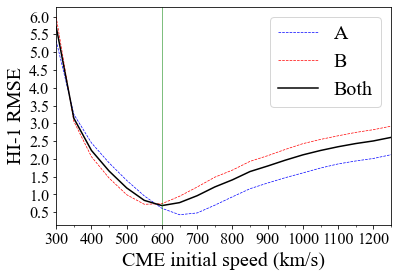

In [97]:
# What initial speed to give HUXt at an inner boundary of 8Rs

# Set up HUXt
event="velocity_test"
v_boundary = np.flip([2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
cr_num = 2077
cr_lon_init = 67.966  * u.deg       # 8rs = 67.966     # 30rs = 63.363
simtime = 10 * u.day
dt_scale = 4                                                                        # This shouldn't need changing frequently
inner_boundary_r = 8 * u.solRad
v_inner = H.map_v_boundary_inwards(v_boundary, 30*u.solRad, 8*u.solRad)
model = H.HUXt(v_boundary=v_inner, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4, r_min = inner_boundary_r)

# Set up CME
t_launch = 0.0 * u.day
longitude = 10.0 * u.deg
latitude = 9.0 * u.deg
width = 42 *u .deg
thickness = 16.9 * u.solRad

# Set up speed values
speed_list = np.arange(300,1300,50)

# Set up dataframe
speed_df = pd.DataFrame()

for velocity in speed_list:
    # set up cme and solve
    cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=velocity*u.km/u.s, thickness=thickness, initial_height = inner_boundary_r)
    cme_list = [cme]
    
    model.solve(cme_list, save=False, tag=event)
    hxta, hxtb = huxt_t_e_profile_fast(cme)

    ts_errorA, ts_errorB, errorA, errorB = calculate_error_new(hxta, hxtb)
    
    # Find error the nose and flank when seen from A and B
    total_NandF = errorA["N & F"] + errorB["N & F"]
    datacountA = ts_errorA["interp flank"].count()+ts_errorA["interp nose"].count()
    datacountB = ts_errorB["interp flank"].count()+ts_errorB["interp nose"].count()
    datacount = datacountA + datacountB
    RMSE = np.sqrt(total_NandF /datacount)

    
    # save in dataframe
    speed_df = speed_df.append({"speed":velocity,
                               "RMSE A":errorA['RMSE N & F'][0],
                               "RMSE B":errorB['RMSE N & F'][0],
                               "RMSE": RMSE[0]},ignore_index=True)
    

# Find minimum RMSE from dataframe
arg,val = np.argmin(speed_df["RMSE"]),np.min(speed_df["RMSE"])

# Create figure displaying information
plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 16.0,"font.family":"Times New Roman"})

fig,ax1 = plt.subplots()
ax1.set_xlabel("CME initial speed (km/s)")
ax1.set_ylabel("HI-1 RMSE")
ax1.set_xlim(left=300, right=1250)
ax1.set_yticks(np.arange(0,np.max(speed_df["RMSE"])+0.5,0.5))
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(MultipleLocator(50))

plt.plot(speed_df["speed"],speed_df["RMSE A"],"--", color='blue', label="A", lw=0.7)
plt.plot(speed_df["speed"],speed_df["RMSE B"],"--", color='red', label="B", lw=0.7)
plt.plot(speed_df["speed"],speed_df["RMSE"], color='black', label="Both")

plt.legend()
plt.axvline(x=speed_df["speed"][arg], color="green", label="Minimim", lw=0.5)
    

#### __2. Running a single member from the lower inner boundary.__

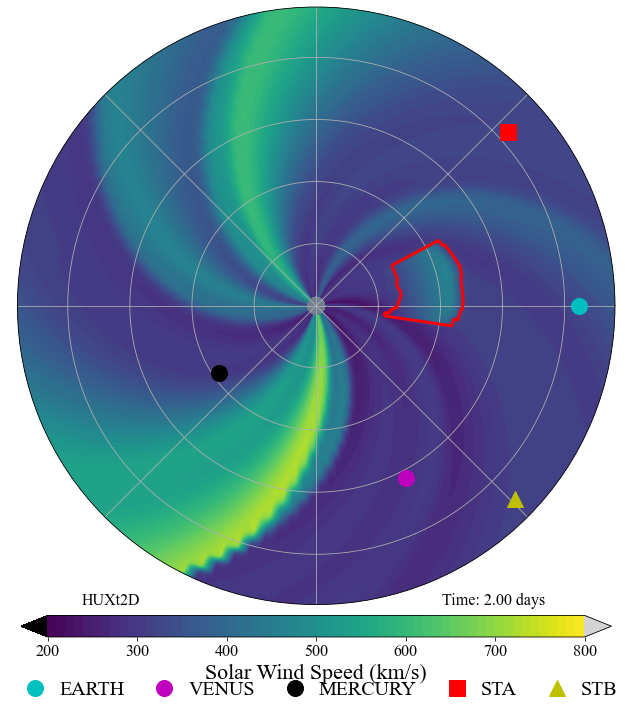

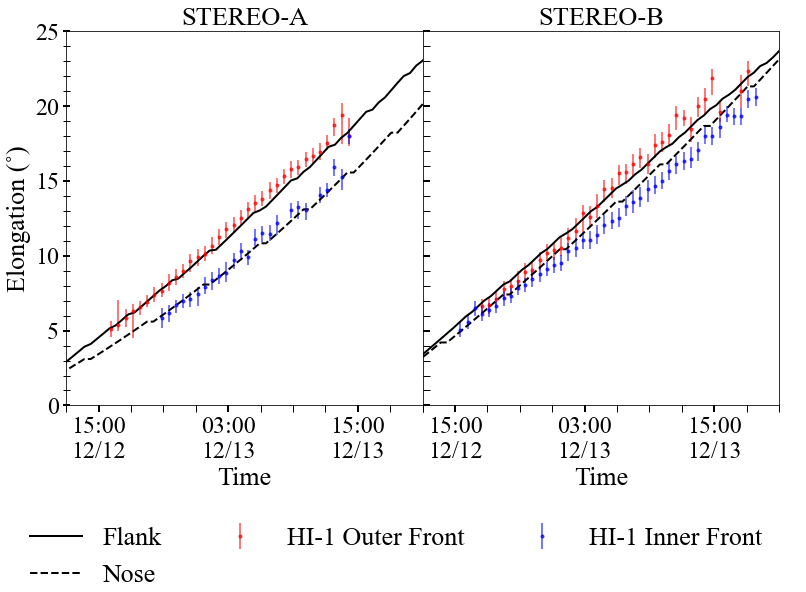

Model inital time:  2008-12-12 10:46:49.895
Leading edge transit time: 3.9798 d
Leading edge arrival time at Earth: 2008-12-16 10:17:45.864
Leading edge arrival speed at Earth: 333.53 km / s


In [134]:
# Tag for file management. Event: 12 December 2008
event = "12Dec08_r=8_BRaVDA-HUXt"

# CME conditions
t_launch = 0.0 * u.day
longitude = 10 * u.deg
latitude = 9 * u.deg
width = 42 * u .deg
v = 600 * (u.km/u.s)
thickness = 16.9 * u.solRad

# HUXt conditions
v_boundary = np.flip([2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
cr_num = 2077
cr_lon_init = 67.966 * u.deg    # 67.966
simtime = 6 * u.day

cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness, initial_height = 8*u.solRad)
cme_list = [cme]

v_inner = H.map_v_boundary_inwards(v_boundary, 30*u.solRad, 8*u.solRad)
model = H.HUXt(v_boundary=v_inner, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4, r_min = 8*u.solRad)

model.solve(cme_list, save=False, tag=event)
model.plot(2*u.d, field='cme', save=False, tag=event)
A,B = huxt_t_e_profile_fast(cme)
elongation_plot_temp(cme, 'HI1',save=False, tag=event)
errorA, errorB = deterministic_error(cme, print_RMSE=False, plot=False, save=False)
compute_earth_arrival(cme, print_values=True, plot=False)


***
***
# Part Two
## __Ensemble run__ 
__From here, functions are introduced to allow HUXt to produce ensembles.__
    

***
#### _Running ensemble and retreving data_ ####


* __run_huxt_ensemble_new__ : Produce a determinisitc and ensemble of HUXt runs for a specified event. BRaVDA-HUXt only.

In [67]:
def run_huxt_ensemble_new_noda(cr_num, cr_lon_init, n_ensemble=100, longitude=0*u.deg, latitude=0*u.deg, width=0*u.deg, v=0*u.km/u.s, thickness=5*u.solRad, t_launch=0.0*u.day,
                          lon_spread=0*u.deg, lat_spread=0*u.deg, width_spread=10*u.deg, v_spread=0*model.kms, thickness_spread=0*u.solRad,
                          map_inwards=False, r_outer=30*u.solRad, r_inner=30*u.solRad, 
                          variable_test = False, variable='', param_space=0, event=''):
    """
    Produce a determinisitc and ensemble of HUXt runs for a specified event. For the deterministic run,
    both the full model solution, and the CME profile are saved in data>HUXt. For the ensemble, only the CME profiles
    are saved in data>HUXt, as this reduces the storage requirements significantly.
    
    THE HUXt SET UP HAS BEEN SET UP FOR USING MAS ONLY.
    
    Parameters
    ----------
    n_ensemble: Number of ensemble memebers, defaults to 100
    variable_test: True or False. Indicates whether you're only changing one variable.
    variable: If variable_test is True, assign the variable you want to change. Only "Width", "Longitude", "Latitude", "Speed", or "Thickness" are accepted.
    param_space: If variable_test is True, assign the parameter space of the variable including the units.
    event: Tag name
    
    Returns
    -------
    A set of files in data>HUXt for the specified event.
    """

    # Set up HUXt for a 5 day simulation1010
    if map_inwards == True:
#         vr_inner = H.map_v_boundary_inwards(v_outer=v_boundary, r_outer=r_outer, r_inner=r_inner)
#         model = H.HUXt(cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=5*u.day, dt_scale=4, r_min=r_inner)       # The same model run as I had coded originally
       print("Cannot use MAS solar wind solution to track CME evolution from lower inner boundary currently.")
    else:
        model = H.HUXt(cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=5*u.day, dt_scale=4)
        
    # Deterministic run first:
#   ---------------------------
    # Setup a ConeCME with these parameters
    conecme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness, initial_height = r_inner)

    # Run HUXt with this ConeCME
    TAG = "{}_{}".format(event , 'deterministic')
    model.solve([conecme], save=True, tag=TAG)
    
    
    # Ensemble run:
#   ---------------------------    
    # Now produce ensemble of HUXt runs with perturbed ConeCME parameters
    np.random.seed(1987)
    
    lon_spread = lon_spread
    lat_spread = lat_spread 
    width_spread = width_spread
    v_spread = v_spread
    thickness_spread = thickness_spread
    r_init_spread = 0 * u.solRad
   
    # Testing an ensemble with changing parameter
    if variable_test:
        lon_spread = 0 * u.deg
        lat_spread = 0 * u.deg
        width_spread = 0 * u.deg
        v_spread = 0 * model.kms
        thickness_spread = 0 * u.solRad
        r_init_spread = 0 * u.solRad
        
        if variable == "Longitude":
            lon_spread = param_space
        elif variable == 'Latitude':
            lat_spread = param_space
        elif variable == 'Width':
            width_spread = param_space
        elif variable == 'Speed':
            v_spread = param_space
        elif variable == 'Thickness':
            thickness_spread = param_space
            
        # should put in a unit check here
    
    for i in range(n_ensemble):
        
        lon = longitude + np.random.uniform(-1, 1, 1)[0] * lon_spread
        lat = latitude + np.random.uniform(-1, 1, 1)[0] * lat_spread
        width_ens = width + np.random.uniform(-1, 1, 1)[0] * width_spread
        v_ens = v + np.random.uniform(-1, 1, 1)[0] * v_spread
        thickness_ens = thickness + np.random.uniform(-1, 1, 1)[0] * thickness_spread
        dt=0*u.s
       
        # Setup the ConeCME and run the model.
        conecme = H.ConeCME(t_launch=dt, longitude=lon, latitude=lat, width=width_ens, v=v_ens, thickness=thickness_ens, initial_height = r_inner)
        tag = "{}_ensemble_{:02d}".format(event, i)
        model.solve([conecme],save=True, tag=tag)
    
    return

* __track_cme_flanks( )__ : Track the nose and flank features thought the model run

In [68]:
def track_cme_flanks(fast=True, tag=''):
    """
    Compute the CME flank and nose elongation for each ensemble member and save to file.
    Parameters
    ----------
    fast: Boolean, default True, of whether to use a faster version of the flank tracking algorithm. Saves a
          significant amount of time, and works for the events studied here. Might not generalise well to other events.
    Returns
    -------
    arrivial_info: global. Dataframe of the arrival time, speed, and transit time of the ensemble CMEs
    Files in data>out_data, with name format ssw_event_ensemble_sta.csv and ssw_event_ensemble_stb.csv
    """
    
    print("Now processing: track_cme_flanks(...)")  # Process message
    
    # Find file path of ensemble files 
    project_dirs = H._setup_dirs_()
    path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_ensemble*.hdf5".format(tag))
    ensemble_files = glob.glob(path)
    n_ens = len(ensemble_files)
    print("Files found: {}. Now processing their data.".format(n_ens))  # Process message

    # Produce a dictionary of keys of column headings for the dataframes 
    # storing the ensemble of time elonation profiles
    keys = []
    parameters = ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']
    for param in parameters:
        for i in range(n_ens):
            keys.append("{}_{:02d}".format(param, i))       

    keys = {k: 0 for k in keys} 

    # Loop over the ensemble files, pull out the elongation profiles.
    for i, file in enumerate(ensemble_files):
        
        print(i)
        
        cme_list = load_cme_file(file)
        cme = cme_list[0] 

        # Compute the time-elongation profiles of the CME features from STA and STB,
        # and store into dataframes for each set of ensembles
        
        if fast:
            hxta, hxtb = huxt_t_e_profile_fast(cme)
     
        if i == 0:    
            # Make pandas array to store all ensemble t_e_profiles.
            keys['time'] = hxta['time']
            ensemble_sta = pd.DataFrame(keys)
            ensemble_stb = pd.DataFrame(keys)

        # Update the ensemble dataframes
        for key in ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']:
            e_key = "{}_{:02d}".format(key, i)
            ensemble_sta[e_key] = hxta[key]
            ensemble_stb[e_key] = hxtb[key]
            
    # ----------        
    # Add deterministic profile to the dataframe
    print("determinisitic")  # Process message
    path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
    deterministic_file = glob.glob(path)
    
    cme_list = load_cme_file(deterministic_file[0])
    cme = cme_list[0] 

    if fast:
        hxta, hxtb = huxt_t_e_profile_fast(cme)
    else:
        hxta, hxtb = huxt_t_e_profile(cme)       # Don't have this module
        
    for key in ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']:
            e_key = "{}_deter".format(key)
            ensemble_sta[e_key] = hxta[key]
            ensemble_stb[e_key] = hxtb[key]
    # ---------- 
            
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_ensemble_sta.csv'
    ensemble_sta.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_ensemble_stb.csv'
    ensemble_stb.to_csv(os.path.join(out_path, out_name))
    
    print("Finished processing: track_cme_flanks(...)")  # Process message

    return 


* __ensemble_cme_dataframes( )__ : Creates all the dataframes required for analysis. 

In [72]:
def ensemble_cme_dataframes(n_ens=100, fast=True, tag=''):
    """
    Produces .csv files for information needed for CME ensemble analysis. Loops through .hdf5 files -- first deterministic, and then 
    ensemble runs chronalogically -- to pull out the cme.
    Datasets:
    ---------
    cme_params: Dictionary of the initial parameters used to define the CME at the model's inner boundary 
    {Keys: Ensemble Run; Time of Launch; Longitude (˚);Latitude (˚); Speed (km/s); Width (˚); Thickness (Rs)}
    ensemble_errorA/ ensemble_errorB: the total residual errors and root mean square errors from the model run
    {Keys: }
    arrival_info: Dictionary with the arrival information of the CME and Earth for each ensmeble run.
    {keys: file; Transit Time; Arrival Time; Arrival Speed, Arrival Time Error, Arrival Speed Error}
    
    """
    
    print("Now processing: ensemble_cme_dataframes(...)")  # Process message
    
    # Produce data-frames to store information
    #----------------------------------------------
    
    # CME INITIAL PARAMETERS
    cme_params = pd.DataFrame()
    
    # ERROR INFORMATION
    ensemble_errorA = pd.DataFrame()
    ensemble_errorB = pd.DataFrame()
    
    # ARRIVAL INFORMATION
    arrival_info = pd.DataFrame()
    
    
    # Deterministic event
    #----------------------------------------------
    # Find file path 
    runtag = "deterministic"
    project_dirs = H._setup_dirs_()
    path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
    filepath = glob.glob(path)[0]
    cme_list = load_cme_file(filepath)
    cme = cme_list[0]
    
    print("deterministic")   # Process message
    
    # Store init params
    cme_params = cme_params.append({"Ensemble Run":runtag, 
                                    "Time of launch": cme.t_launch, 
                                    "Longitude (˚)":cme.longitude.to(u.deg).value,
                                    "Latitude (˚)":cme.latitude.to(u.deg).value, 
                                    "Speed (km/s)": cme.v.value,
                                    "Width (˚)": cme.width.value,
                                    "Thickness (Rs)":cme.thickness.value,
                                    "Initial Radial Height (Rs)": cme.initial_height.value}, ignore_index=True)
    
    # error calculations
    if fast:
        hxta, hxtb = huxt_t_e_profile_fast(cme)
    else:
        hxta, hxtb = huxt_t_e_profile(cme)       # Don't have this module
    
    
    ts_errorA, ts_errorB, errorA, errorB = calculate_error_new(hxta, hxtb)
    
    # Find error the nose and flank when seen from A and B
    total_NandF = errorA["N & F"] + errorB["N & F"]
    datacountA = ts_errorA["interp flank"].count()+ts_errorA["interp nose"].count()
    datacountB = ts_errorB["interp flank"].count()+ts_errorB["interp nose"].count()
    datacount = datacountA + datacountB
    RMSE_NandF = np.sqrt(total_NandF /datacount)
    
    ensemble_errorA =  ensemble_errorA.append({'file': runtag, 
                                                'total flank error':errorA['flank'][0],
                                                'total nose error':errorA['nose'][0],
                                                'total sec flank error': float('NaN'),
                                                'total N & F error': errorA['N & F'][0],
                                                'RMSE flank error': errorA['RMSE flank'][0],
                                                'RMSE nose error': errorA['RMSE nose'][0],
                                                'RMSE sec flank error': float('NaN'),
                                                'RMSE N & F error': errorA['RMSE N & F'][0],
                                                'total error w/ ST-B': total_NandF[0],
                                                'RMSE error w/ ST-B': RMSE_NandF[0]},ignore_index = True)
    ensemble_errorB =  ensemble_errorB.append({'file': runtag, 
                                                'total flank error':errorB['flank'][0],
                                                'total nose error':errorB['nose'][0],
                                                'total sec flank error': errorB['sec flank'][0],
                                                'total N & F error': errorB['N & F'][0],
                                                'RMSE flank error': errorB['RMSE flank'][0],
                                                'RMSE nose error': errorB['RMSE nose'][0],
                                                'RMSE sec flank error': errorB['RMSE sec flank'][0],
                                                'RMSE N & F error': errorB['RMSE N & F'][0],
                                                'total error w/ ST-A': total_NandF[0],
                                                'RMSE error w/ ST-A': RMSE_NandF[0]},ignore_index = True)

    # arrival information
    compute_earth_arrival(cme, print_values=False, plot=False)
    if cme.earth_transit_time == np.NaN*u.d or cme.earth_arrival_time == Time('0000-01-01T00:00:00') or cme.earth_arrival_speed == np.NaN *u.km/u.s:
        time_error = np.NaN 
        speed_error = np.NaN *u.km/u.s
        arrival_info = arrival_info.append({"file": runtag,
                                        "Transit Time" : np.NaN, 
                                        "Arrival Time" : Time('3000-01-01T00:00:00').jd,
                                        "Arrival Speed" : np.NaN,
                                        "Arrival Time Error (seconds)" : np.NaN,
                                        "Arrival Speed Error (km/s)" : np.NaN}, ignore_index=True)
        
    else:
        time_error, speed_error = arrival_error(cme)
        arrival_info = arrival_info.append({"file": runtag,
                                            "Transit Time" : cme.earth_transit_time.value, 
                                            "Arrival Time" : cme.earth_arrival_time.jd,
                                            "Arrival Speed" : cme.earth_arrival_speed.value,
                                            "Arrival Time Error (seconds)" : time_error,
                                            "Arrival Speed Error (km/s)" : speed_error.value}, ignore_index=True)
    
    
    
    # Ensemble events
    #----------------------------------------------
    for i in range(n_ens):
        runtag = "ensemble_{:02d}".format(i)
        path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_{}.hdf5".format(tag,runtag))
        filepath = glob.glob(path)[0]
        cme_list = load_cme_file(filepath)
        cme = cme_list[0]
        
        print(i)  # Process message

        # Store init params
        cme_params = cme_params.append({"Ensemble Run":runtag, 
                                        "Time of launch": cme.t_launch, 
                                        "Longitude (˚)":cme.longitude.to(u.deg).value,
                                        "Latitude (˚)":cme.latitude.to(u.deg).value, 
                                        "Speed (km/s)": cme.v.value,
                                        "Width (˚)": cme.width.value,
                                        "Thickness (Rs)":cme.thickness.value,"Initial Radial Height (Rs)": cme.initial_height.value}, ignore_index=True)
        # error calculations
        if fast:
            hxta, hxtb = huxt_t_e_profile_fast(cme)
        else:
            hxta, hxtb = huxt_t_e_profile(cme)       # Don't have this module
            
        
    
        ts_errorA, ts_errorB, errorA, errorB = calculate_error_new(hxta, hxtb)
        
        # Find error the nose and flank when seen from A and B
        total_NandF = errorA["N & F"] + errorB["N & F"]
        datacountA = ts_errorA["interp flank"].count()+ts_errorA["interp nose"].count()
        datacountB = ts_errorB["interp flank"].count()+ts_errorB["interp nose"].count()
        datacount = datacountA + datacountB
        RMSE_NandF = np.sqrt(total_NandF /datacount)
    
        ensemble_errorA =  ensemble_errorA.append({'file': runtag, 
                                                    'total flank error':errorA['flank'][0],
                                                    'total nose error':errorA['nose'][0],
                                                    'total sec flank error': float('NaN'),
                                                    'total N & F error': errorA['N & F'][0],
                                                    'RMSE flank error': errorA['RMSE flank'][0],
                                                    'RMSE nose error': errorA['RMSE nose'][0],
                                                    'RMSE sec flank error': float('NaN'),
                                                    'RMSE N & F error': errorA['RMSE N & F'][0],
                                                    'total error w/ ST-B': total_NandF[0],
                                                    'RMSE error w/ ST-B': RMSE_NandF[0]},ignore_index = True)
        ensemble_errorB =  ensemble_errorB.append({'file': runtag, 
                                                    'total flank error':errorB['flank'][0],
                                                    'total nose error':errorB['nose'][0],
                                                    'total sec flank error': errorB['sec flank'][0],
                                                    'total N & F error': errorB['N & F'][0],
                                                    'RMSE flank error': errorB['RMSE flank'][0],
                                                    'RMSE nose error': errorB['RMSE nose'][0],
                                                    'RMSE sec flank error': errorB['RMSE sec flank'][0],
                                                    'RMSE N & F error': errorB['RMSE N & F'][0],
                                                    'total error w/ ST-A': total_NandF[0],
                                                    'RMSE error w/ ST-A': RMSE_NandF[0]},ignore_index = True)

        # arrival information
        compute_earth_arrival(cme, print_values=False, plot=False)
        if cme.earth_transit_time == np.NaN*u.d or cme.earth_arrival_time == Time('0000-01-01T00:00:00') or cme.earth_arrival_speed == np.NaN *u.km/u.s:
            time_error = np.NaN 
            speed_error = np.NaN *u.km/u.s
            arrival_info = arrival_info.append({"file": runtag,
                                            "Transit Time" : np.NaN, 
                                            "Arrival Time" : Time('3000-01-01T00:00:00').jd,
                                            "Arrival Speed" : np.NaN,
                                            "Arrival Time Error (seconds)" : np.NaN,
                                            "Arrival Speed Error (km/s)" : np.NaN}, ignore_index=True)
        
        else:
            time_error, speed_error = arrival_error(cme)
            arrival_info = arrival_info.append({"file": runtag,
                                                "Transit Time" : cme.earth_transit_time.value, 
                                                "Arrival Time" : cme.earth_arrival_time.jd,
                                                "Arrival Speed" : cme.earth_arrival_speed.value,
                                                "Arrival Time Error (seconds)" : time_error,
                                                "Arrival Speed Error (km/s)" : speed_error.value}, ignore_index=True)

    # End of ensemble loop
    
    
    # Check files for NaN run. NaN elongation runs can occur due to the combination in inital parameters. 
    # If the nose and flank elongtion is NaN, add the index value to a list. Then, drop these values from the dataframe. 
    NaN_runA = []
    is_NaN_flanka = ensemble_errorA["RMSE flank error"].isnull()
    is_NaN_nosea = ensemble_errorA["RMSE nose error"].isnull()
    for i in range(len(ensemble_errorA)):
        if is_NaN_flanka[i]==True & is_NaN_nosea[i]==True:
            NaN_runA.append(i)
            
    NaN_runB = []       
    is_NaN_flankb = ensemble_errorB["RMSE flank error"].isnull()
    is_NaN_noseb = ensemble_errorB["RMSE nose error"].isnull()
    for j in range(len(ensemble_errorB)):
        if is_NaN_flankb[j]==True & is_NaN_noseb[j]==True:
            NaN_runB.append(j)
    
    for k in range(len(NaN_runA)):
        if NaN_runA[k] == NaN_runB[k]:
            ensemble_errorA = ensemble_errorA.drop([NaN_runA[k]])
            ensemble_errorB = ensemble_errorB.drop([NaN_runA[k]])
            arrival_info = arrival_info.drop([NaN_runA[k]])
    


    # Save files
    out_path = project_dirs['HUXt_data']

    out_name = tag + '_cme_params.csv'
    cme_params.to_csv(os.path.join(out_path, out_name))
    
    out_name = tag + '_ensemble_errorA.csv'
    ensemble_errorA.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_ensemble_errorB.csv'
    ensemble_errorB.to_csv(os.path.join(out_path, out_name))
    
    out_name = tag + '_arrival_info.csv'
    arrival_info.to_csv(os.path.join(out_path, out_name))
    
    print("Finished processing: ensemble_cme_dataframes(...)")  # Process message
    
    return 


* __ensemble_error( )__ : Create dataframe of the errors (total/ RMSE) of all features for the whole ensemble

In [71]:
def ensemble_error(n_ens=100, save=False, tag=''):
    """
    Calculates the error between the ensemble runs and the HI observations. 
    
    Params:
    --------
    n_ens: Number of ensemble members
    save: True or False. Saves dataframes to local files.
    tag: Tag name of event
    
    Return:
    ------
    ensemble_errorA : Dataframe of the total residual-squared error and RMSE of each features, as seen from STEREO-A
    ensemble_errorB : Dataframe of the total residual-squared error and RMSE of each features, as seen from STEREO-B
    
    """
    
    # load in elongation profiles for the ensemble runs 
    #df_ensembleA, df_ensembleB, ens_timeA, ens_timeB = load_elongation_data(tag=tag)
    
    # Create dataframe for storing residual information
    ensemble_errorA = pd.DataFrame()
    ensemble_errorB = pd.DataFrame()
    
                                                                                                    # Attempt One!
                                                                                                    # --------------
                                                                                                    # Loop over range of ensemble files, inc. deterministic.
                                                                                                #     for i in range(n_ens+1):
                                                                                                #         if i == 0:
                                                                                                #             run = 'deterministic'
                                                                                                #             print('deterministic width: ',cme.width)
                                                                                                #             sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
                                                                                                #             ts_errorA, ts_errorB, errorA, errorB = calculate_error(sta_profile, stb_profile)

                                                                                                #         elif i > 0:
                                                                                                #             run = "_{:02d}".format(i-1)        # ensemble run labelling starts at 0

                                                                                                #             # Create the elongation datafiles for A and B
                                                                                                #             sta_profile = pd.DataFrame()
                                                                                                #             sta_profile['time'] = ens_timeA.jd
                                                                                                #             sta_profile['lon'] = df_ensembleA['lon'+run]
                                                                                                #             sta_profile['r'] = df_ensembleA['r'+run]
                                                                                                #             sta_profile['el'] = df_ensembleA['el'+run]
                                                                                                #             sta_profile['lon_n'] = df_ensembleA['lon_n'+run]
                                                                                                #             sta_profile['r_n'] = df_ensembleA['r_n'+run]
                                                                                                #             sta_profile['el_n'] = df_ensembleA['el_n'+run]
                                                                                                #             sta_profile['lon_sec_flank'] = df_ensembleA['lon_sec_flank'+run]
                                                                                                #             sta_profile['r_sec_flank'] = df_ensembleA['r_sec_flank'+run]
                                                                                                #             sta_profile['el_sec_flank'] = df_ensembleA['el_sec_flank'+run]

                                                                                                #             stb_profile = pd.DataFrame()
                                                                                                #             stb_profile['time'] = ens_timeB.jd
                                                                                                #             stb_profile['lon'] = df_ensembleB['lon'+run]
                                                                                                #             stb_profile['r'] = df_ensembleB['r'+run]
                                                                                                #             stb_profile['el'] = df_ensembleB['el'+run]
                                                                                                #             stb_profile['lon_n'] = df_ensembleB['lon_n'+run]
                                                                                                #             stb_profile['r_n'] = df_ensembleB['r_n'+run]
                                                                                                #             stb_profile['el_n'] = df_ensembleB['el_n'+run]
                                                                                                #             stb_profile['lon_sec_flank'] = df_ensembleB['lon_sec_flank'+run]
                                                                                                #             stb_profile['r_sec_flank'] = df_ensembleB['r_sec_flank'+run]
                                                                                                #             stb_profile['el_sec_flank'] = df_ensembleB['el_sec_flank'+run]

                                                                                                #             # Calculate the error
                                                                                                #             ts_errorA, ts_errorB, errorA, errorB = calculate_error(sta_profile, stb_profile)
    
    # Attempt Two!
    # --------------
    project_dirs = H._setup_dirs_()
    for i in range(n_ens+1):
        if i == 0:
            ens_run = "deterministic"
            filename = "HUXt_CR2077_{}_deterministic.hdf5".format(tag)
            path = os.path.join(project_dirs['HUXt_data'], filename)
            filepath = glob.glob(path)[0]
            cme_list = load_cme_file(filepath)
            cme = cme_list[0] 
        else:
            # use i-1 as the first ensemble run is "ensemble_00"
            ens_run = "ensemble_{:02d}".format(i-1)
            filename = "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,i-1)
            path = os.path.join(project_dirs['HUXt_data'], filename)
            filepath = glob.glob(path)[0]
            cme_list = load_cme_file(filepath)
            cme = cme_list[0] 

        profileA, profileB = huxt_t_e_profile_fast(cme)
        ts_errorA, ts_errorB, errorA, errorB = calculate_error(profileA, profileB)
    # ------------------
 
            
        ensemble_errorA =  ensemble_errorA.append({'file': ens_run, 
                                                    'total flank error':errorA['flank'][0],
                                                    'total nose error':errorA['nose'][0],
                                                    'total sec flank error': float('NaN'),
                                                    'RMSE flank error': errorA['RMSE flank'][0],
                                                    'RMSE nose error': errorA['RMSE nose'][0],
                                                    'RMSE sec flank error': float('NaN')},ignore_index = True)
            
        ensemble_errorB =  ensemble_errorB.append({'file': ens_run, 
                                                    'total flank error':errorB['flank'][0],
                                                    'total nose error':errorB['nose'][0],
                                                    'total sec flank error': errorB['sec flank'][0],
                                                    'RMSE flank error': errorB['RMSE flank'][0],
                                                    'RMSE nose error': errorB['RMSE nose'][0],
                                                    'RMSE sec flank error': errorB['RMSE sec flank'][0]},ignore_index = True)
        
    # add a two-feature (nose & flank) error values
    ensemble_errorA["total two feature error"] = ensemble_errorA["total flank error"] + ensemble_errorA["total nose error"]
    ensemble_errorA["RMSE two feature error"] = ensemble_errorA["RMSE flank error"] + ensemble_errorA["RMSE nose error"]
        
    ensemble_errorB["total two feature error "] = ensemble_errorB["total flank error"] + ensemble_errorB["total nose error"]
    ensemble_errorB["RMSE two feature error"] = ensemble_errorB["RMSE flank error"] + ensemble_errorB["RMSE nose error"]
    
    if save:
        # Save dataframe as a csv file in the correct file
        out_path = project_dirs['HUXt_data']
        out_name = tag + '_errors_sta.csv'
        ensemble_errorB.to_csv(os.path.join(out_path, out_name))
        out_name = tag + '_errors_stb.csv'
        ensemble_errorB.to_csv(os.path.join(out_path, out_name))
        
    return ensemble_errorA, ensemble_errorB
            
              
        

* __arrival_error( )__ : calculates the arrival time and speed error at L1 for the model run

In [74]:
def arrival_error(cme):
    """
    Calculates the residual error (model - observation) for the arrival of the CME at EARTH.
    Return:
    -------
    time_error: timedelta of the arrival time
    speed_error: difference in arrival speed, in km/s
    """
    
    # Check that arrival information exists as a global parameter
    if 'obs_arrival_time' in globals():
        # Variable exists
        pass
    else:
        print('No variable called "obs_arrival_time".')
        
    if 'obs_arrival_speed' in globals():
       # Variable exists
        pass
    else:
        print('No variable called "obs_arrival_speed".')
        
    if cme.earth_transit_time == np.NaN*u.d or cme.earth_arrival_time == Time('0000-01-01T00:00:00') or cme.earth_arrival_speed == np.NaN *u.km/u.s:
        time_error = 99999999 
        speed_error = 99999999 *u.km/u.s
    else:
        # Calculate error with observation  (model - observation)
        time_error =  (cme.earth_arrival_time.datetime - obs_arrival_time.datetime).total_seconds()
        speed_error = (cme.earth_arrival_speed - obs_arrival_speed)
    
    return time_error, speed_error
    
    

***
#### _Loading File_ ####


* __load_cme_file( )__ : Load in data from a saved HUXt run. Return the cme_list

In [75]:
def load_cme_file(filepath):
    """
    Load in data from a saved HUXt run.
    :param filepath: The full path to a HDF5 file containing the output from HUXt.save()
    :return: cme_list: A list of instances of ConeCME
    :return: model: An instance of HUXt containing loaded results.
    """
    if os.path.isfile(filepath):

        data = h5py.File(filepath, 'r')

        # Create list of the ConeCMEs
        cme_list = []
        all_cmes = data['ConeCMEs']
        for k in all_cmes.keys():
            cme_data = all_cmes[k]
            t_launch = cme_data['t_launch'][()] * u.Unit(cme_data['t_launch'].attrs['unit'])
            lon = cme_data['longitude'][()] * u.Unit(cme_data['longitude'].attrs['unit'])
            lat = cme_data['latitude'][()] * u.Unit(cme_data['latitude'].attrs['unit'])
            width = cme_data['width'][()] * u.Unit(cme_data['width'].attrs['unit'])
            thickness = cme_data['thickness'][()] * u.Unit(cme_data['thickness'].attrs['unit'])
            thickness = thickness.to('solRad')
            v = cme_data['v'][()] * u.Unit(cme_data['v'].attrs['unit'])
            cme = H.ConeCME(t_launch=t_launch, longitude=lon, latitude=lat, v=v, width=width, thickness=thickness)

            # Now sort out coordinates.
            # Use the same dictionary structure as defined in ConeCME._track_2d_
            coords_group = cme_data['coords']
            coords_data = {j: {'time':np.array([]), 'model_time': np.array([]) * u.s,
                               'lon_pix': np.array([]) * u.pix, 'r_pix': np.array([]) * u.pix,
                               'lon': np.array([]) * u.rad, 'r': np.array([]) * u.solRad,
                              'lat': np.array([]) * u.rad}
                               for j in range(len(coords_group))}

            for time_key, pos in coords_group.items():
                t = np.int(time_key.split("_")[2])
                #coords_data[t]['time'] = Time(pos['time'][()], format="isot")
                coords_data[t]['time'] = Time(model.time_init + model.time_out[t])
                #coords_data[t]['model_time'] = pos['model_time'][()] * u.Unit(pos['model_time'].attrs['unit'])
                coords_data[t]['model_time'] = model.time_out[t] * u.s
                coords_data[t]['lon_pix'] = pos['lon_pix'][()] * u.Unit(pos['lon_pix'].attrs['unit'])
                coords_data[t]['r_pix'] = pos['r_pix'][()] * u.Unit(pos['r_pix'].attrs['unit'])
                coords_data[t]['lon'] = pos['lon'][()] * u.Unit(pos['lon'].attrs['unit'])
                coords_data[t]['r'] = pos['r'][()] * u.Unit(pos['r'].attrs['unit'])
                #coords_data[t]['lat'] = pos['lat'][()] * u.Unit(pos['lat'].attrs['unit'])
                
            cme.coords = coords_data
            
            #cme.compute_earth_arrival()
            cme_list.append(cme)

    else:
        # File doesnt exist return nothing
        print("Warning: {} doesnt exist.".format(filepath))
        cme_list = []

    return cme_list

* __load_elongation_data( )__ : Loads time-elongation profile into dataframes from local folders

In [76]:
# Reading in ensemble elongation data --  DONT THINK THIS YET INCLUDES DETERMINISTIC RUN THEREFORE IMPLICATIONS MAY COME WHEN TIDYING THIS UP. BE WARNED.
def load_elongation_data(tag=''):
    """
    Load .csv file of ensemble elongation data. Time in astropy format is assigined to its own varible.
    Return
    -------
    Dateframe fo the ensemble elongation data,
    The time of ensemble runs    - But this should be the same as model.time_out / sta_profile.time/ etc.
    """
    project_dirs = H._setup_dirs_()

    pathA = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_sta.csv")
    df_ensembleA = pd.read_csv(r"{}".format(pathA))
    ens_timeA= Time(df_ensembleA["time"],format = 'jd')

    pathB = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_stb.csv")
    df_ensembleB = pd.read_csv(r"{}".format(pathB))
    ens_timeB = Time(df_ensembleB["time"],format = 'jd')
    
    return df_ensembleA, df_ensembleB, ens_timeA, ens_timeB


* __load_csv_file( )__ : Load in dataframe that was made by the "ensemble_cme_dataframe()" function
| |

In [77]:
def load_csv_file(file, tag=''):
    """
    Load data files with important values for ananysis of ensembe forecasting 
    Params:
    -------
    file: Name of file that need to be uploaded. Use one of the following : elongation profiles; errors; initial parameters; arrival information; best fit run.
    tag: tag name of the ensemble.
    
    Return:
    --------
    data :  dataframes of the .csv file. Some files return two dataframes and require two varibale names to be assigned. 
    """
    
    project_dirs = H._setup_dirs_()
    
    if file == "elongation profiles":
        pathA = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_sta.csv")
        ens_profileA = pd.read_csv(r"{}".format(pathA))
        ens_profileA = ens_profileA.drop(columns=['Unnamed: 0'])

        pathB = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_stb.csv")
        ens_profileB = pd.read_csv(r"{}".format(pathB))
        ens_profileB = ens_profileB.drop(columns=['Unnamed: 0'])
        
        data = ens_profileA, ens_profileB
        
    if file == "errors":
        pathA = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_errorA.csv")
        ens_errorA = pd.read_csv(r"{}".format(pathA))
        ens_errorA = ens_errorA.drop(columns=['Unnamed: 0'])
        pathB = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_errorB.csv")
        ens_errorB = pd.read_csv(r"{}".format(pathB))
        ens_errorB = ens_errorB.drop(columns=['Unnamed: 0'])
        
        data = ens_errorA, ens_errorB

    if file == "initial parameters":
        path = os.path.join(project_dirs['HUXt_data'], tag+"_cme_params.csv")
        cme_parameters = pd.read_csv(r"{}".format(path))
        cme_parameters = cme_parameters.drop(columns=['Unnamed: 0'])
        
        data = cme_parameters
        
    if file == "arrival information":
        path = os.path.join(project_dirs['HUXt_data'], tag+"_arrival_info.csv")
        arrival_info = pd.read_csv(r"{}".format(path))
        arrival_info = arrival_info.drop(columns=['Unnamed: 0'])
        
        data = arrival_info
        
    if file == "best fit run":
        path = os.path.join(project_dirs['HUXt_data'], tag+"_bestfitA.csv")
        best_fit_runA = pd.read_csv(r"{}".format(path))
        best_fit_runA = best_fit_runA.drop(columns=['Unnamed: 0'])
        
        path = os.path.join(project_dirs['HUXt_data'], tag+"_bestfitB.csv")
        best_fit_runB = pd.read_csv(r"{}".format(path))
        best_fit_runB = best_fit_runB.drop(columns=['Unnamed: 0'])
        
        path = os.path.join(project_dirs['HUXt_data'], tag+"_bestfitMISC.csv")
        best_fit_runMISC = pd.read_csv(r"{}".format(path))
        best_fit_runMISC = best_fit_runMISC.drop(columns=['Unnamed: 0'])
        
        data = best_fit_runA, best_fit_runB, best_fit_runMISC
    

    return data

***
#### _Analysis_ ####

* __locate_bestfit_run( )__ : Returns dataframes of the model runs (of the stated ensemble) that best fits the observations

In [139]:
def locate_bestfit_run(tag=''):
    """
    Seraches through the ensemble errors to locate the model run that produces the time-elongation profile 
    that best agrees with the observation. The member that produces the best arrival time and arrival speed 
    is returned as well. 
    
    Params:
    ---------
    tag: the tag will locate the ensemble of the same name.
    
    return:
    -------
    bestfitA: Error, Arrival Time, Arrival Speed, File Argument for the flank, nose and combined feature from 
                STEREO-A position
    bestfitB:Error, Arrival Time, Arrival Speed, File Argument for the flank, nose and combined feature from 
                STEREO-B position
    bestfitMISC: Error, Arrival Time, Arrival Speed, File Argument for the combined features from both spacecraft.
                The best arrival time and arrival speed is listed too.
    
    """
    # Read in .csv file for the ensemble errors
    ens_errorA, ens_errorB = load_csv_file(file = "errors", tag=tag)
    arrival_info = load_csv_file(file = "arrival information", tag=tag)
    
    # ================
    # Minimum error with HI observations
    # ================
    
    # Find the minimum residuals -  this will identify the best fit ensemble run
    flank_minA_arg = np.argmin(ens_errorA["RMSE flank error"])
    flank_minA = ens_errorA["total flank error"][flank_minA_arg]
    flank_min_rmseA = np.min(ens_errorA["RMSE flank error"])
    flankA_TOA = Time(arrival_info["Arrival Time"][flank_minA_arg:flank_minA_arg+1], format='jd')[0]
    flankA_SOA = arrival_info["Arrival Speed"][flank_minA_arg:flank_minA_arg+1].values[0]
    
    nose_minA_arg = np.argmin(ens_errorA["RMSE nose error"])
    nose_minA = ens_errorA["total nose error"][nose_minA_arg]
    nose_min_rmseA = np.min(ens_errorA["RMSE nose error"])
    noseA_TOA = Time(arrival_info["Arrival Time"][nose_minA_arg:nose_minA_arg+1], format='jd')[0]
    noseA_SOA = arrival_info["Arrival Speed"][nose_minA_arg:nose_minA_arg+1].values[0]
    
    twofeature_minA_arg = np.argmin(ens_errorA["RMSE N & F error"])
    twofeature_minA = ens_errorA["total N & F error"][twofeature_minA_arg]
    twofeature_min_rmseA = np.min(ens_errorA["RMSE N & F error"])
    twofeatureA_TOA = Time(arrival_info["Arrival Time"][twofeature_minA_arg:twofeature_minA_arg+1], format='jd')[0]
    twofeatureA_SOA = arrival_info["Arrival Speed"][twofeature_minA_arg:twofeature_minA_arg+1].values[0]
    
    flank_minB_arg = np.argmin(ens_errorB["RMSE flank error"])
    flank_minB = ens_errorB["total flank error"][flank_minB_arg]
    flank_min_rmseB = np.min(ens_errorB["RMSE flank error"])
    flankB_TOA = Time(arrival_info["Arrival Time"][flank_minB_arg:flank_minB_arg+1], format='jd')[0]
    flankB_SOA = arrival_info["Arrival Speed"][flank_minB_arg:flank_minB_arg+1].values[0]
        
    nose_minB_arg = np.argmin(ens_errorB["RMSE nose error"])
    nose_minB = ens_errorB["total nose error"][nose_minB_arg]
    nose_min_rmseB = np.min(ens_errorB["RMSE nose error"])
    noseB_TOA = Time(arrival_info["Arrival Time"][nose_minB_arg:nose_minB_arg+1], format='jd')[0]
    noseB_SOA = arrival_info["Arrival Speed"][nose_minB_arg:nose_minB_arg+1].values[0]
    
#     sec_flank_minB_arg = np.argmin(ens_errorB["RMSE sec flank error"])
#     sec_flank_minB = ens_errorB["total sec flank error"][sec_flank_minB_arg]
#     sec_flank_min_rmseB = np.min(ens_errorB["RMSE sec flank error"])
#     sec_flankB_TOA = Time(arrival_info["Arrival Time"][sec_flank_minB_arg:sec_flank_minB_arg+1], format='jd')[0]
#     sec_flankB_SOA = arrival_info["Arrival Speed"][sec_flank_minB_arg:sec_flank_minB_arg+1].values[0]
        
    twofeature_minB_arg = np.argmin(ens_errorB["RMSE N & F error"])
    twofeature_minB = ens_errorB["total N & F error"][twofeature_minB_arg]
    twofeature_min_rmseB = np.min(ens_errorB["RMSE N & F error"])
    twofeatureB_TOA = Time(arrival_info["Arrival Time"][twofeature_minB_arg:twofeature_minB_arg+1], format='jd')[0]
    twofeatureB_SOA = arrival_info["Arrival Speed"][twofeature_minB_arg:twofeature_minB_arg+1].values[0]

    # Flank and nose from both STEREO A and B
    NandF_min_arg = np.argmin(ens_errorB["RMSE error w/ ST-A"])
    NandF_min = ens_errorB["total error w/ ST-A"][NandF_min_arg]
    NandF_min_rmse = np.min(ens_errorB["RMSE error w/ ST-A"])
    NandF_TOA = Time(arrival_info["Arrival Time"][NandF_min_arg:NandF_min_arg+1], format='jd')[0]
    NandF_SOA = arrival_info["Arrival Speed"][NandF_min_arg:NandF_min_arg+1].values[0]
    
    # Put check in that these values are the same if determined from the ens_errorA dataframe.
    
    # ================
    # Minimum error with ACE arrival information
    # ================
    time_min = np.min(abs(arrival_info["Arrival Time Error (seconds)"]))
    time_min_arg = np.where(abs(arrival_info["Arrival Time Error (seconds)"]) == time_min)[0]
    
    speed_min = np.min(abs(arrival_info["Arrival Speed Error (km/s)"]))
    speed_min_arg = np.where(abs(arrival_info["Arrival Speed Error (km/s)"]) == speed_min)[0]
    
    
    
    # Save bestfit file runs to a dataframe and save
    global bestfitA, bestfitB, bestfitMISC
    bestfitA = pd.DataFrame({'Feature':['flank', 'nose', 'N & F'],
                             'Total Minimum Error':[flank_minA, nose_minA, twofeature_minA],
                             'RMSE Minimum Error':[flank_min_rmseA, nose_min_rmseA, twofeature_min_rmseA],
                             'File arg.':[flank_minA_arg, nose_minA_arg, twofeature_minA_arg],
                             'Arrival Time':[flankA_TOA, noseA_TOA, twofeatureA_TOA],
                             'Arrival Time (iso)':[flankA_TOA.iso, noseA_TOA.iso, twofeatureA_TOA.iso],
                             'Arrival Speed':[flankA_SOA, noseA_SOA, twofeatureA_SOA]
                            })
                            
    bestfitB = pd.DataFrame({'Feature':['flank','nose', 'N & F'],
                             'Total Minimum Error':[flank_minB, nose_minB, twofeature_minB],
                             'RMSE Minimum Error':[flank_min_rmseB, nose_min_rmseB, twofeature_min_rmseB],
                             'File arg.':[flank_minB_arg, nose_minB_arg, twofeature_minB_arg],
                             'Arrival Time':[flankB_TOA, noseB_TOA,twofeatureB_TOA],
                             'Arrival Time (iso)':[flankB_TOA.iso, noseB_TOA.iso,twofeatureB_TOA.iso],
                             'Arrival Speed':[flankB_SOA, noseB_SOA, twofeatureB_SOA]
                            })

    bestfitMISC = pd.DataFrame({'Feature':[ 'Both Spacecrafts', 'arrival time', 'arrival speed'],
                             'Total Minimum Error':[NandF_min, time_min, speed_min],
                             'RMSE Minimum Error':[NandF_min_rmse, float('NaN'), float('NaN')],
                             'File arg.':[NandF_min_arg, time_min_arg, speed_min_arg],
                             'Arrival Time':[NandF_TOA, float('NaN'), float('NaN')],
                             'Arrival Time':[NandF_TOA.iso, float('NaN'), float('NaN')],
                             'Arrival Speed':[NandF_SOA, float('NaN'), float('NaN')]
                            })
    
    
    project_dirs = H._setup_dirs_()
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_bestfitA.csv'
    bestfitA.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_bestfitB.csv'
    bestfitB.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_bestfitMISC.csv'
    bestfitMISC.to_csv(os.path.join(out_path, out_name))
    
    return bestfitA, bestfitB, bestfitMISC

* __cme_init_param( )__ : Load in initial parameter values from filepath.

In [81]:
def cme_init_param(filepath):
    """
    Load in initial parameter values from filepath.
    Params:
    ---------
    filepath: The full path to a HDF5 file containing the output from HUXt.save()
    Return:
    ---------
    cme
    """
    if os.path.isfile(filepath):

        data = h5py.File(filepath, 'r')

        # Create list of the ConeCMEs
        cme_list = []
        all_cmes = data['ConeCMEs']
        for k in all_cmes.keys():
            cme_data = all_cmes[k]
            t_launch = cme_data['t_launch'][()] * u.Unit(cme_data['t_launch'].attrs['unit'])
            lon = cme_data['longitude'][()] * u.Unit(cme_data['longitude'].attrs['unit'])
            lat = cme_data['latitude'][()] * u.Unit(cme_data['latitude'].attrs['unit'])
            width = cme_data['width'][()] * u.Unit(cme_data['width'].attrs['unit'])
            thickness = cme_data['thickness'][()] * u.Unit(cme_data['thickness'].attrs['unit'])
            thickness = thickness.to('solRad')
            v = cme_data['v'][()] * u.Unit(cme_data['v'].attrs['unit'])
            cme = H.ConeCME(t_launch=t_launch, longitude=lon, latitude=lat, v=v, width=width, thickness=thickness)
            
    else:
        # File doesnt exist return nothing
        print("Warning: {} doesnt exist.".format(filepath))
        

    return cme

* __cme_param_df( )__ : Loop through deterministic and ensemble files to pull out initial conditions of the runs. Store in a dataframe.

In [82]:
def cme_param_df(n_ens = 100, tag = ''):
    """
    Loop through deterministic and ensemble files to pull out initial conditions of the runs. Store in a dataframe.
    Saved to HUXt>data as .csv file.
    Params:
    --------
    n_ens: Number of ensemble members
    tag: Tag name
    Return:
    --------
    cme_params: DataFrame of intial parameters of ConeCME used to run HUXt model.
    """
    project_dirs = H._setup_dirs_()
    
    cme_params = pd.DataFrame()
    
    for i in range(n_ens+1):
        if i == 0:
            ens_run = "deterministic"
            filename = "HUXt_CR2077_{}_deterministic.hdf5".format(tag)
            path = os.path.join(project_dirs['HUXt_data'], filename)
            filepath = glob.glob(path)[0]
            cme = cme_init_param(filepath)
        else:
            # use i-1 as the first ensemble run is "ensemble_00"
            ens_run = "ensemble_{:02d}".format(i-1)
            filename = "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,i-1)
            path = os.path.join(project_dirs['HUXt_data'], filename)
            filepath = glob.glob(path)[0]
            cme = cme_init_param(filepath)
         
        # Add shortened file name and initial parameters to the dateframe
        cme_params = cme_params.append({"Ensemble Run":ens_run, 
                                        "Time of launch": cme.t_launch, 
                                        "Longitude":cme.longitude.to(u.deg),
                                        "Latitude":cme.latitude.to(u.deg), 
                                        "Speed": cme.v,
                                        "Width": cme.width,
                                        "Thickness":cme.thickness}, ignore_index=True)
        
    # Save dataframe as a .csv file in the correct file
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_cme_ensemble_init_parameters.csv'
    cme_params.to_csv(os.path.join(out_path, out_name))
    
    return cme_params

* __bestfit_cme_init_param( )__ : Returns a dataframe of the inital parameters that were used in the best fit model runs, located in "locate_bestfit_runs()"

In [83]:
def bestfit_cme_init_param(STEREO, tag=''):
    """
    Store the best fit ensemble initial parameters in a dataframe for each feature. Here, best fit refers to the run in
    which the total resiual error was the smallest of all runs.
    Params:
    --------
    STEREO: Indicate which spacecraft your want to find information for. Either 'A' or'B'.
    tag: Tag name for files
    Return:
    --------
    bestfit_param: Dataframe of the cme initial parameters for the best fit run.
    """
    project_dirs = H._setup_dirs_()
    
    if STEREO == 'A':
        bestfit_param = pd.DataFrame()
        
        for i in range(len(bestfitA)):
            feature = bestfitA["Feature"][i]
            file_arg = bestfitA["File arg."][i]
            if bestfitA["File arg."][i] == 0:
                ens_run = "deterministic"
                filename = "HUXt_CR2077_{}_deterministic.hdf5".format(tag)
                path = os.path.join(project_dirs['HUXt_data'], filename)
                filepath = glob.glob(path)[0]
                cme_list = load_cme_file(filepath)
                cme = cme_list[0]
                
            else:
                ens_run = file_arg-1
                filename = "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,file_arg-1)
                path = os.path.join(project_dirs['HUXt_data'], filename)
                filepath = glob.glob(path)[0]
                cme_list = load_cme_file(filepath)
                cme = cme_list[0]
        
            
    if STEREO == 'B':
        bestfit_param = pd.DataFrame()
    
        for i in range(len(bestfitB)):
            feature = bestfitB["Feature"][i]
            file_arg = bestfitB["File arg."][i]
            if bestfitB["File arg."][i] == 0:
                ens_run = "deterministic"
                filename = "HUXt_CR2077_{}_deterministic.hdf5".format(tag)
                path = os.path.join(project_dirs['HUXt_data'], filename)
                filepath = glob.glob(path)[0]
                cme_list = load_cme_file(filepath)
                cme = cme_list[0]
                
            else:
                ens_run = file_arg-1
                filename = "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,ens_run)
                path = os.path.join(project_dirs['HUXt_data'], filename)
                filepath = glob.glob(path)[0]
                cme_list = load_cme_file(filepath)
                cme = cme_list[0]

    bestfit_param = bestfit_param.append({"Feature":feature, 
                                                  "Ensemble Run":ens_run, 
                                                  "Time of launch": cme.t_launch, 
                                                  'Longitude':cme.longitude,
                                                  'Latitude':cme.latitude, 
                                                  'Speed': cme.v,
                                                  'Width': cme.width,
                                                  'Thickness':cme.thickness}, ignore_index=True)
        
    # Save dataframe as a csv file in the correct file
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_bestfit_parameters' + STEREO +'.csv'
    bestfit_param.to_csv(os.path.join(out_path, out_name))

    return bestfit_param

* __best_fit_runs( )__ : Will display dataframes containing information of the "best fit" model members.

In [142]:
def best_fit_runs(inner_boundary_r, ETplot=True, tag=''):
    """
    Params:
    -------
    inner_boundary_r : 
    ETplot: If true, will show the time-elongation plot of the members

    Return
    ------
    Displays of the minimum error for each feature as seen from each spacecraft, and the elongation-time profile and animation for each feature (if true)
    
    """
    # Load dataframes
    a, b, misc = locate_bestfit_run(tag=tag)
    cme_init_params = load_csv_file(file = "initial parameters", tag=tag)
    ens_profilesA, ens_profilesB = load_csv_file(file = "elongation profiles", tag=tag)
    
    # Display the minimum error for each feature
    a.columns.name = "Best Fit Run STEREO-A"
    b.columns.name = "Best Fit Run STEREO-B"
    misc.columns.name = "Best Fit Run BOTH"
    display(a,b,misc)
    
    # create dataframe for the best fit initial parameters 
    bf_cme_param = pd.DataFrame()
    
    project_dirs = H._setup_dirs_()
    
        
    # Pull all values that are arguements from A and B
    # ----------------------------------------
    arg_list = list()
    for arg in (a['File arg.']):
        arg_list.append(arg)

            
    for arg in (b['File arg.']):
        arg_list.append(arg)

    for arg in (misc['File arg.']):
        if isinstance(arg,np.int64)==True:
            arg_list.append(arg)
        elif arg.size > 1:
            for j in range(arg.size):
                arg_list.append(arg[j])
        else:
            arg_list.append(arg[0])
        
    # --------------- end loop ---------------
    
    # Loop through argument list to make the elongation-time profiles and     
    for arg in (arg_list):
        # Tag name 
        t = tag+'_ensemble_{:02d}'.format(arg-1)      
        
        # Add the slice of cme parameters to the df 
        bf_cme_param = bf_cme_param.append(cme_init_params[arg:arg+1])


        # Load cme file and rerun HUXt
        if arg == 0:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
        else:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,arg-1))
        filepath = glob.glob(path)[0]
        cme_list = load_cme_file(filepath)
        cme = cme_list[0]
      
   
        if ETplot==True:
            # run the elongation-time plot function
            #elongation_time_plot(cme_profile, 'HI1',save=True, tag=t)
            elongation_plot_temp(cme,'HI1',save=True, tag=t)

    display (bf_cme_param)
    return

***
#### _Plotting_ ####

* __ensemble_elongation_plot_nandf( )__ : Returns plot of all the time-elongation profiles of ensemble members from both spacecraft.

In [88]:
def ensemble_elongation_plot_nandf(FOV, n_ens = 100, save=False, tag=''):
    """
    Produces elongation-time plots of the identified feature with deterministic run in black, ensemble runs in grey, and 
    HI observation in coloured error-bars. 
    Params:
    ---------
    FOV: Either "HI1" or "HI2"
    feature: Either "initial flank", "nose", "secondary flank"
    n_ens: Number of ensemble memebers.
    save: False. Saves figure to HUXt>figures.
    tag: Tag names of files
    Returns:
    ---------
    Single figure of 2x1 suplots of elongation-time profiles for one feature.
    
    """
    # Plot elongation-time profiles from STEREO POV, inc observations.
    
    # load elongation data
    ens_profileA, ens_profileB = load_csv_file(file = "elongation profiles", tag=tag)
    

    # Find plotting limits using ther deterministic run
    
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(ens_profileA)):
            if ens_profileA.el_n_deter[i] < 30:    # this run is equal to the huxta output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_a = i
            if ens_profileB.el_n_deter[i] < 30:    # this run is equal to the huxtb output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(ens_profileA.el)
        FOVlimit_a = len(ens_profileA)
        FOVlimit_b = len(ens_profileB)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
    # this may need a try command.    

    # Format time
    time_a = Time(ens_profileA.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(ens_profileB.time, format = 'jd').datetime[0:FOVlimit_b]
    

    # Plot figure
    plt.rcParams.update({'font.size': 22, 'axes.labelsize':22, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})
    fig, ax = plt.subplots(1, 2, figsize = [12,6])
    
    for nn, axs in enumerate(ax):
        locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
        formatter = mdates.ConciseDateFormatter(locator)
        axs.xaxis.set_major_locator(locator)
        axs.xaxis.set_major_formatter(formatter)

#     ax[0].set_title('STEREO-A')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Elongation (˚)')
    ax[0].set_ylim(top=ymax)   

    # plot ensemble runs of the feature
    # flank
    for i in range(n_ens):
        yaxisplot = "el_{:02d}".format(i)
        ax[0].plot(time_a, ens_profileA[yaxisplot][0:FOVlimit_a], 'lightpink', linewidth=1, zorder=0,alpha=0.2)

    ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),
            fmt='.',color='k', label='HI-1 front 1', markersize=1.5, linewidth=.5, zorder=5)
    ax[0].plot(time_a, ens_profileA.el_deter[0:FOVlimit_a],'red', label='Initial Flank', linewidth=1, zorder=1)
        
    # nose
    for i in range(n_ens):
        yaxisplot = "el_n_{:02d}".format(i)
        ax[0].plot(time_a, ens_profileA[yaxisplot][0:FOVlimit_a], 'lightskyblue', linewidth=1, zorder=0,alpha=0.2)

    ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']),
            fmt='.',color='k', label='HI-1 front 2', markersize=1.5, linewidth=.5, zorder=5)
    ax[0].plot(time_a, ens_profileA.el_n_deter[0:FOVlimit_a], 'blue', label='Nose', linewidth=1, zorder=1)   
    
#     ax[1].set_title('STEREO-B')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Elongation (˚)')
    ax[1].set_ylim(top=ymax)                                 
    
    # plot ensemble runs of the feature
    # flank
    for i in range(n_ens):
        yaxisplot = "el_{:02d}".format(i)
        ax[1].plot(time_b, ens_profileB[yaxisplot][0:FOVlimit_b], 'lightpink', linewidth=1, zorder=0, alpha=0.2)

    ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']),
             fmt='.',color='k', label='HI-1 front 1 (OUTER)',markersize=1.5, linewidth=.5, zorder=5)
    ax[1].plot(time_b, ens_profileB.el_deter[0:FOVlimit_b], 'red', label='Initial Flank', linewidth=1, zorder=1)
        
    # nose
    for i in range(n_ens):
        yaxisplot = "el_n_{:02d}".format(i)
        ax[1].plot(time_b, ens_profileB[yaxisplot][0:FOVlimit_b], 'lightskyblue', linewidth=1, zorder=0, alpha=0.2)

    ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),
             fmt='.',color='k', label='HI-1 front 2 (INNER)', markersize=1.5, linewidth=.5, zorder=5)
    ax[1].plot(time_b, ens_profileB.el_n_deter[0:FOVlimit_b], 'blue', label='Nose', linewidth=1, zorder=1)   

    ax[0].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
    ax[1].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
        
    fig.tight_layout()
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=60 ) 
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=60 ) 

    if save:
        cr_num = np.int32(model.cr_num.value)
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile_N&F.png".format(cr_num, tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=150, bbox_inches='tight')
        
    return

* __plot_resdiual_errors( )__
| |

In [46]:
def plot_residual_errors(n_ens=100, plot = True, save=False, tag=''):
    """
    Upon computing the residual errors of the ensemble model runs, this funtion will find the minimum error (i.e. best fit run) for each 
    feature combination and store in HUXt > data file. If plot, a figure of two subplots will show the total residual 
    Params:
    --------
    n_ens: Number of ensemble memebers. Pre-set to 1000
    plot: True or False. Pre-set as True.
    save: True or False. Pre-set as False.
    tag: Tag names of files
    Return:
    --------
    bestfitA/ bestfitB: Dataframe storing the minimum residal error and file argument of the best-fit ensemble run for each feature.
    """
    
    # Compute residual errors of the ensemble run. Return dataframes used here.
    #residuals_sta, residuals_stb = residual_errors(n_ens=n_ens, tag=tag)
    residuals_sta, residuals_stb = ensemble_error(n_ens=n_ens, save=False, tag=tag)
    
    # Find the minimum residuals -  this will identify the best fit ensemble run
    flank_minA_arg = np.argmin(residuals_sta["total flank error"])
    flank_minA = np.min(residuals_sta["total flank error"])
    
    nose_minA_arg = np.argmin(residuals_sta["total nose error"])
    nose_minA = np.min(residuals_sta["total nose error"])

    twofeature_minA_arg = np.argmin(residuals_sta["total two feature error"])
    twofeature_minA = np.min(residuals_sta["total two feature error"])
    
    flank_minB_arg = np.argmin(residuals_stb["total flank error"])
    flank_minB = np.min(residuals_stb["total flank error"])
            
    nose_minB_arg = np.argmin(residuals_stb["total nose error"])
    nose_minB = np.min(residuals_stb["total nose error"])
            
    sec_flank_minB_arg = np.argmin(residuals_stb["total sec flank error"])
    sec_flank_minB = np.min(residuals_stb["total sec flank error"])
        
    twofeature_minB_arg = np.argmin(residuals_stb["total two feature error"])
    twofeature_minB = np.min(residuals_stb["total two feature error"])

#     threefeature_minB_arg = np.argmin(residuals_stb["total 3 feature error"])
#     threefeature_minB = np.min(residuals_stb["total 3 feature error"])
    
    # Save bestfit file runs to a dataframe and save
    global bestfitA, bestfitB
    bestfitA = pd.DataFrame({'Feature':['flank','nose','2 feature'],'Minimum Error':[flank_minA, nose_minA,twofeature_minA],
                            'File arg.':[flank_minA_arg, nose_minA_arg,twofeature_minA_arg]})
                            
    bestfitB = pd.DataFrame({'Feature':['flank','nose','sec flank','2 feature'],
                             'Minimum Error':[flank_minB, nose_minB, sec_flank_minB, twofeature_minB],
                             'File arg.':[flank_minB_arg, nose_minB_arg, sec_flank_minB_arg, twofeature_minB_arg]})
    
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_bestfitA.csv'
    bestfitA.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_bestfitB.csv'
    bestfitB.to_csv(os.path.join(out_path, out_name))
    
    if plot:
        
        # Make list of x-axis labels.
        xlabels = []
        xlabels.append("deterministic")
        for i in range(n_ens):
            xlabels.append("run {}".format(i))
       
        fig, (axA, axB) = plt.subplots(2,1, figsize = [16,25])
        
        # Format x-axis labels
        plt.setp(axA, xticks=range(n_ens+1), xticklabels=xlabels)
        plt.setp(axB, xticks=range(n_ens+1), xticklabels=xlabels)
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=90)
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=90)

        axA.set_title('STEREO-A')
        axA.set_xlabel('Ensemble run')
        axA.set_ylabel('$Residual^ 2$')
        axA.plot(residuals_sta["total flank error"],'lightcoral', label = "Flank")
        axA.plot(residuals_sta["total nose error"],'deepskyblue', label= "Nose")
        axA.plot(residuals_sta["total two feature error"],'k', label = "Flank & Nose")
#         axA.plot(residuals_sta["total sec flank error"],'limegreen', label= "Secondary Flank")
#         axA.plot(residuals_sta["total 3 feature error"],'k--', label = "Flank & Nose & Sec. Flank")
        
        # Mark best fit run
        axA.plot(flank_minA_arg, flank_minA,'r.', markersize = 10)
        axA.plot(nose_minA_arg , nose_minA,'b.', markersize = 10)
        axA.plot(twofeature_minA_arg, twofeature_minA,'k.', markersize = 10)
        
        axB.set_title('STEREO-B')
        axB.set_xlabel('Ensemble run')
        axB.set_ylabel('$Residual^ 2$')
        axB.plot(residuals_stb["total flank error"],'lightcoral', label = "Flank")
        axB.plot(residuals_stb["total nose error"],'deepskyblue', label= "Nose")
        axB.plot(residuals_stb["total sec flank error"],'limegreen', label= "Secondary Flank")
        axB.plot(residuals_stb["total two feature error"],'k', label = "Flank & Nose")
#         axB.plot(residuals_stb["total 3 feature error"],'k--', label = "Flank & Nose & Sec. Flank")
        
        # Mark best fit run
        axB.plot(flank_minB_arg, flank_minB,'r.', markersize = 10)
        axB.plot(nose_minB_arg, nose_minB,'b.', markersize = 10)
        axB.plot(twofeature_minB_arg, twofeature_minB,'k.', markersize = 10)
        axB.plot(sec_flank_minB_arg, sec_flank_minB,'g.', markersize = 10)
#         axB.plot(threefeature_minB_arg, threefeature_minB,'.', color='orange', markersize = 10)

        axB.legend(loc=[1.1,0.35], frameon=False)
        
        if save:
            filename = "HUXt_{}_residual_plot.png".format(tag)
            filepath = os.path.join(model._figure_dir_, filename)            
            fig.savefig(filepath,dpi=150, bbox_inches='tight')
    
    return 


* __plot_ensemble_errors( )__
| |

In [47]:
 def plot_ensemble_errors ():
        """
        
        """
        # Load csv files
        # error
        # best-fit

        # Make list of x-axis labels.
        xlabels = []
        xlabels.append("deterministic")
        for i in range(n_ens):
            xlabels.append("run {}".format(i))
       
        fig, (axA, axB) = plt.subplots(2,1, figsize = [16,25])
        
        # Format x-axis labels
        plt.setp(axA, xticks=range(n_ens+1), xticklabels=xlabels)
        plt.setp(axB, xticks=range(n_ens+1), xticklabels=xlabels)
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=90)
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=90)

        axA.set_title('STEREO-A')
        axA.set_xlabel('Ensemble run')
        axA.set_ylabel('$Residual^ 2$')
        axA.plot(residuals_sta["total flank error"],'lightcoral', label = "Flank")
        axA.plot(residuals_sta["total nose error"],'deepskyblue', label= "Nose")
        axA.plot(residuals_sta["total two feature error"],'k', label = "Flank & Nose")
#         axA.plot(residuals_sta["total sec flank error"],'limegreen', label= "Secondary Flank")
#         axA.plot(residuals_sta["total 3 feature error"],'k--', label = "Flank & Nose & Sec. Flank")
        
        # Mark best fit run
        axA.plot(flank_minA_arg, flank_minA,'r.', markersize = 10)
        axA.plot(nose_minA_arg , nose_minA,'b.', markersize = 10)
        axA.plot(twofeature_minA_arg, twofeature_minA,'k.', markersize = 10)
        
        axB.set_title('STEREO-B')
        axB.set_xlabel('Ensemble run')
        axB.set_ylabel('$Residual^ 2$')
        axB.plot(residuals_stb["total flank error"],'lightcoral', label = "Flank")
        axB.plot(residuals_stb["total nose error"],'deepskyblue', label= "Nose")
        axB.plot(residuals_stb["total sec flank error"],'limegreen', label= "Secondary Flank")
        axB.plot(residuals_stb["total two feature error"],'k', label = "Flank & Nose")
#         axB.plot(residuals_stb["total 3 feature error"],'k--', label = "Flank & Nose & Sec. Flank")
        
        # Mark best fit run
        axB.plot(flank_minB_arg, flank_minB,'r.', markersize = 10)
        axB.plot(nose_minB_arg, nose_minB,'b.', markersize = 10)
        axB.plot(twofeature_minB_arg, twofeature_minB,'k.', markersize = 10)
        axB.plot(sec_flank_minB_arg, sec_flank_minB,'g.', markersize = 10)
#         axB.plot(threefeature_minB_arg, threefeature_minB,'.', color='orange', markersize = 10)

        axB.legend(loc=[1.1,0.35], frameon=False)
        
        if save:
            filename = "HUXt_{}_residual_plot.png".format(tag)
            filepath = os.path.join(model._figure_dir_, filename)            
            fig.savefig(filepath,dpi=150, bbox_inches='tight')
    
        return 

* __variable_plots( )__
| |

In [48]:
def variable_plots(variable,n_ens=100, save=False, tag=''):
    """
    Creates a combined dataframe of cme initial parameters and residual errors for every ensemble run (inc. deterministic).
    Then, by sorting the dataframe in acending order by assigned variable, returns a figure displaying this information. 
    Params:
    --------
    variable: the inital variable in which the ensemble model is changing. Must be one of these: "Width", "Longitide", 
                "Latitude", "Speed", or "Thickness"
    n_ens: Number of ensemble members. Pre-set as 100
    save: True or False. Pre-set as False
    tag: Tag name of files. 
    Return:
    --------
    Figure of resdiual error by ascending variable for each STEREO spacecraft.
    """
    
    # Compute a dataframe of inital CME parameters from the ensemble runs (inc. deterministic)
    cme_params = cme_param_df(n_ens=n_ens, tag=tag)
    
    # Compute a dataframe of residuals from the ensemble runs (inc. deterministic)
#     residuals_sta, residuals_stb = residual_errors(n_ens=n_ens, tag=tag)
    ensemble_errorA, ensemble_errorB = ensemble_error(n_ens=n_ens, save=False, tag=tag)
    
    residuals_sta = ensemble_errorA
    residuals_stb = ensemble_errorB 
    # Create dataframe of initial params and residual errors
    global ens_info
    ens_info = pd.DataFrame()
    
    ens_info["Ensemble run"] = cme_params["Ensemble Run"]
    ens_info["Latitude"] = cme_params["Latitude"]
    ens_info["Longitude"] = cme_params["Longitude"]
    ens_info["Speed"] = cme_params["Speed"]
    ens_info["Width"] = cme_params["Width"]
    ens_info["Thickness"] = cme_params["Thickness"]
    #ens_info["Time of Launch"] = cme_params["Time of Launch"]
    
    ens_info["Flank error A"] = residuals_sta['total flank error']
    ens_info["Nose error A"] = residuals_sta['total nose error']
    ens_info["Sec flank error A"] = float('NaN')
#     ens_info["2 feature error A"] = residuals_sta['total 2 feature error']
#     ens_info["3 feature error A"] = float('NaN')
    
    ens_info["Flank error B"] = residuals_stb['total flank error']
    ens_info["Nose error B"] = residuals_stb['total nose error']
    ens_info["Sec flank error B"] = residuals_stb['total sec flank error']
#     ens_info["2 feature error B"] = residuals_stb['total 2 feature error']
#     ens_info["3 feature error B"] = residuals_stb['total 3 feature error']
    
                                                                                        #     Combine dataframes together
                                                                                        #     cme_params['flank error A'] = residuals_sta['total flank error']
                                                                                        #     cme_params['nose error A'] = residuals_sta['total nose error']
                                                                                        #     cme_params['sec flank error A'] = residuals_sta['total sec flank error']
                                                                                        #     cme_params['2 feature error A'] = residuals_sta['total 2 feature error']
                                                                                        #     cme_params['3 feature error A'] = residuals_sta['total 3 feature error']

                                                                                        #     cme_params['flank error B'] = residuals_stb['total flank error']
                                                                                        #     cme_params['nose error B'] = residuals_stb['total nose error']
                                                                                        #     cme_params['sec flank error B'] = residuals_stb['total sec flank error']
                                                                                        #     cme_params['2 feature error B'] = residuals_stb['total 2 feature error']
                                                                                        #     cme_params['3 feature error B'] = residuals_stb['total 3 feature error']
    
    
    # Since init params are stored with a unit attached, here we make the column unitless so that 
    # the variable can be sorted in ascending order. Also create x label for plots.
    if variable == 'Width':
        xlabel = 'Width ($˚$)'
        unit = u.deg
        for i in range(len(ens_info)):
            ens_info['Width'][i] = ens_info['Width'][i] / unit
    
    elif variable == "Latitude":
        xlabel = 'Latitude (˚)'
        unit = u.rad
        for i in range(len(ens_info)):
            ens_info['Latitude'][i] = ens_info['Latitude'][i] / unit 
    
    elif variable == "Longitude":
        xlabel = 'Longitude(˚)'
        unit = u.rad
        for i in range(len(ens_info)):
            # making - longitude angles be below 0 for plotting
            if ens_info['Longitude'][i] > 180*u.deg:
                ens_info['Longitude'][i] = ens_info['Longitude'][i]-360*u.deg
            ens_info['Longitude'][i] = ens_info['Longitude'][i] / unit
   
    elif variable == "Speed":
        xlabel = 'Speed ($kms^{-1}$)'
        unit = u.km/u.s
        for i in range(len(ens_info)):
            ens_info['Speed'][i] = ens_info['Speed'][i] / unit
    
    elif variable == "Thickness":
        xlabel = 'Thickness (solRad)'
        unit = u.solRad
        for i in range(len(ens_info)):
            ens_info['Thickness'][i] = ens_info['Thickness'][i] / unit
    
    # Sort dataframe so variable plotting will be in ascending order
    global sorted_df
    sorted_df =  ens_info.sort_values(by=variable)
   

    # Plot figure
    fig, (axA, axB) = plt.subplots(2, 1, figsize = [18,12])

    axA.set_title('STEREO-A')
    axA.set_xlabel(xlabel)
    axA.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axA.set_ylabel('$Residual^ 2$')
    axA.plot(sorted_df[variable],sorted_df['Flank error A'], 'lightcoral')
    axA.plot(sorted_df[variable],sorted_df['Nose error A'], 'deepskyblue')
#     axA.plot(sorted_df[variable],sorted_df['2 feature error A'], 'k')
    
    axB.set_title('STEREO-B')
    axB.set_xlabel(xlabel)
    axB.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axB.set_ylabel('$Residual^ 2$')
    axB.plot(sorted_df[variable],sorted_df['Flank error B'], 'lightcoral', label='Flank')
    axB.plot(sorted_df[variable],sorted_df['Nose error B'], 'deepskyblue', label='Nose')
    axB.plot(sorted_df[variable],sorted_df['Sec flank error B'], 'limegreen', label='Secondary Flank')
#     axB.plot(sorted_df[variable],sorted_df['2 feature error B'], 'k', label = 'Flank & Nose')
#     axB.plot(sorted_df[variable],sorted_df['3 feature error B'], 'orange', label = 'All Features')
    
    axB.legend(loc=[1.1,0.35], frameon=False)
    fig.tight_layout()
    
    if save:
        filename = "HUXt_{}_variable_sensitivity_{}.png".format( tag, variable)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=150, bbox_inches='tight')
        
    
    return
    
    



* __elongation_time_plot( )__
| |

In [49]:
def elongation_time_plot(profile,FOV,save=False, tag=''):
    """
    Plot elongation-time profiles from STEREO POV, inc HI observations.
    Paramaters
    FOV: either 'HI1' or 'HI2'
    save: if Ture, figure is saved to files
    tag: tag for file names
    
    Return:
    A 2x1 plot of the elongation-time profile for all the features from the viewpoint of 1) STEREO-A and 2) STEREO-B
    """
   
    
    # Find plotting limits
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(sta_profile)):
            if profile.el_n_a[i] < 30:
                FOVlimit_a = i
            if profile.el_n_b[i] < 30:
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(profile.el_f_a)
        FOVlimit_a = len(profile)
        FOVlimit_b = len(profile)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
    # this may need a try command.    

    # Format time  -  Here I am using the output from the model.getobserver() command. Would be simplier if I used sta_profile.time
                                                                        #     time_a = sta.time.to_value('datetime')[0:FOVlimit_a]
                                                                        #     time_b = stb.time.to_value('datetime')[0:FOVlimit_b]
    time_a = Time(profile.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(profile.time, format = 'jd').datetime[0:FOVlimit_b]


    plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})

    # Plot figure
    fig, ax = plt.subplots(1, 2, figsize = [18,12])
    
    for nn, axs in enumerate(ax):
        locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
        formatter = mdates.ConciseDateFormatter(locator)
        axs.xaxis.set_major_locator(locator)
        axs.xaxis.set_major_formatter(formatter)
    
    #ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))
    ax[0].set_title('STEREO-A')
    ax[0].set_xlabel('Time', labelpad=30)
    ax[0].set_ylabel('Elongation (˚)')
    ax[0].set_ylim(top=ymax)                                 

    ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),
                fmt='.',color='pink', label='HI-1 front 1')
    ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']),
                fmt='.',color='skyblue', label='HI-1 front 2')
    #axA.errorbar(HItimeA,front3a['el'],yerr=(front3a['el_lo_error'], front3a['el_hi_error']),
    #             fmt='.',color='lightgreen', label='HI-1 front 3')
    ax[0].plot(time_a, profile.el_f_a[0:FOVlimit_a],'k', label='Initial Flank')
    ax[0].plot(time_a, profile.el_n_a[0:FOVlimit_a], 'k--', label='Nose')
    # axA.plot(time_a, sta_profile.el_sec_flank[0:FOVlimit_a], 'darkgrey', label='Secondary Flank')
#     ax[0].plot(HItimeA,interp_elA[0:FOVlimit_a],'k.')
#     ax[0].plot(HItimeA,interp_el_nA[0:FOVlimit_a],'k.')
    #axA.plot(HItimeA,interp_el_sec_flankaA,'.',color='darkgrey')
    
    #ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))
    ax[1].set_title('STEREO-B')
    ax[1].set_xlabel('Time', labelpad=30)
    ax[1].set_ylabel('Elongation (˚)')
    ax[1].set_ylim(top=ymax)                                 

    ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']),
                 fmt='.',color='pink', label='HI-1 front 1 (OUTER)')
    ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),
                 fmt='.',color='skyblue', label='HI-1 front 2 (INNER)')
    ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']),
                 fmt='.',color='lightgreen', label='HI-1 front 3')
    ax[1].plot(time_b, profile.el_f_b[0:FOVlimit_b], 'k', label='Initial Flank')
    ax[1].plot(time_b,profile.el_n_b[0:FOVlimit_b], 'k--', label='Nose')
    ax[1].plot(time_b, profile.el_secf_b[0:FOVlimit_b], 'darkgrey', label='Secondary Flank')
#     ax[1].plot(HItimeB,interp_elB,'k.')
#     ax[1].plot(HItimeB,interp_el_nB,'k.')
#     ax[1].plot(HItimeB,interp_el_sec_flankB,'.',color='darkgrey')
    plt.setp( ax[0].xaxis.get_majorticklabels(), rotation=60 ) 
    plt.setp( ax[1].xaxis.get_majorticklabels(), rotation=60 )   
    #axB.legend(loc='best', bbox_to_anchor=[1.6,0.5])
    ax[1].legend(loc=[1.1,0.35], frameon=False)
    fig.tight_layout()

    if save:
        cr_num = np.int32(model.cr_num.value)
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile.png".format(cr_num, tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath)
        
    return


* __plot_bestfit_runs( )__
| |

In [50]:
def plot_bestfit_runs(tag):    
    """
    
    """
    # Load in best-fit dataframe
    A, B, MISC = locate_bestfit_run(tag=tag)
    
    # Store file arguements in list
    arg_list = A['File arg.'].to_list()+ B['File arg.'].to_list()+ MISC['File arg.'][0].to_list
    
    # make list of tag names
    tag_list = ['flankA','noseA','n&fA','flankB','noseB','sec_flankB','n&fB', 'n&f_both']
    
    if len(arg_list)!=len(tag_list):
        print ("Length of tag name list doesn't equal the length of file arugements. Error may occur due to limited conditions met in function.")
    
    project_dirs = H._setup_dirs_()
    for index, arg in enumerate(arg_list):
        if arg == 'deterministic':
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR{}_{}_deterministic.hdf5".format(cr_num,tag)) 
        else:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR{}_{}_ensemble_{}*.hdf5".format(cr_num,tag,arg-1))
        ensemble_run = glob.glob(path)[0]
        model, cme_list = H.load_HUXt_run(ensemble_run)
        model.animate('cme',tag_list[index])
        cme = cme_list[0]
        hxt_sta, hxt_stb = huxt_t_e_profile_fast(cme)
        elongation_plot('HI1',save=True, tag =tag_list[index])
        
    return
    

***
***
## Run an Ensemble ##

We run four ensembles from these cells. Changes need to be made to some of the variables depending on which ensemble is being ran.
On changing the variables to fit the required need, the following cell will compute the ensmebles runs, track the nose and flank features, and find the error in the fit compared to the HI1 observations.

* For the inner boundary height to work, we must __run the deterministic case first__, using the relevant cells above.
If this isn't done, the features will be tracked froom the last boundary height defined

* If running from a lower inner boundary, make sure __map_inwards=True__ is set in _run_huxt_ensemble_new_. Thus, varible will be false is ran from 30Rs..

__1. Set-up ensemble__

In [125]:
TAG = "12Dec08_n=200_r=8_PS=2"  

# Tag names for all four ensembles:
# "12Dec08_n=200_r=30_PS=1"
# "12Dec08_n=200_r=30_PS=2"
# "12Dec08_n=200_r=8_PS=1"
# "12Dec08_n=200_r=8_PS=2"

# CME deterministic conditions
t_launch = 0.0 * u.day
longitude = 10.0 * u.deg
latitude = 9.0 * u.deg
width = 42 *u .deg
v = 600 * (u.km/u.s)                # 8rs = 600      # 30rs = 497
thickness = 16.9 * u.solRad            # 8rs = 16.9     # 30rs = 5

# HUXt conditions
# BRaVDA solar wind speed is used.
v_boundary = np.flip([2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
cr_num = 2077
cr_lon_init = 67.966  * u.deg       # 8rs = 67.966     # 30rs = 63.363
simtime = 6 * u.day
dt_scale = 4                        # This shouldn't need changing frequently
inner_boundary_r = 8 * u.solRad     # 8rs = 8      # 30Rs = 30

# Ensemble info
N = 200

#  Allow initial parameters to vary within COR uncertainty
# lon_spread = 4 * u.deg
# lat_spread = 2 * u.deg
# width_spread = 6 * u.deg   
# v_spread = 100 * model.kms           # 8rs = 100      # 30rs = 63
# thickness_spread = 2 * u.solRad
# r_init_spread = 0 * u.solRad

#  Allow initial parameters to vary within double the COR uncertainty
lon_spread = 8 * u.deg
lat_spread = 4 * u.deg
width_spread = 12 * u.deg
v_spread = 200 * model.kms            # 8rs = 200      # 30rs = 126
thickness_spread = 4 * u.solRad
r_init_spread = 0 * u.solRad

__2. Run Ensemble & Track Features__

In [126]:
# Run the model and track the CME features  
#--------------------------------------------
# If running HUXt from lower boundary, ensure map_inwards=True.
run_huxt_ensemble_new(v_boundary,cr_num, cr_lon_init, n_ensemble=N, 
                      longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness, t_launch=t_launch, r_inner=inner_boundary_r,
                      lon_spread = lon_spread, lat_spread = lat_spread, width_spread = width_spread, v_spread = v_spread, thickness_spread = thickness_spread,
                      map_inwards=True,  variable_test = False, event=TAG)
track_cme_flanks(fast=True, tag=TAG)
ensemble_cme_dataframes(n_ens = N, fast=True, tag=TAG)

Now processing: track_cme_flanks(...)
Files found: 200. Now processing their data.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
determinisitic
Finished processing: track_cme_flanks(...)
Now processing: ensemble_cme_dataframes(...)
deterministic
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39



__3. Look at the ensemble spread by plotting time elongation profiles against the observations__

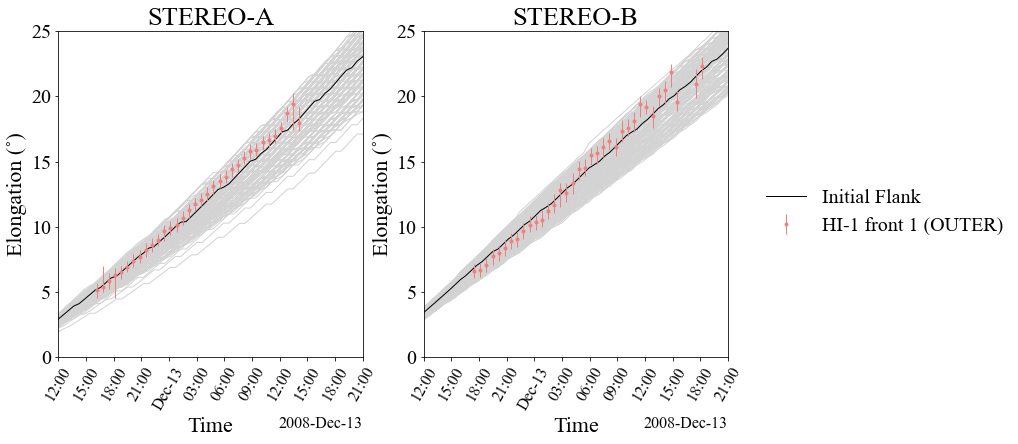

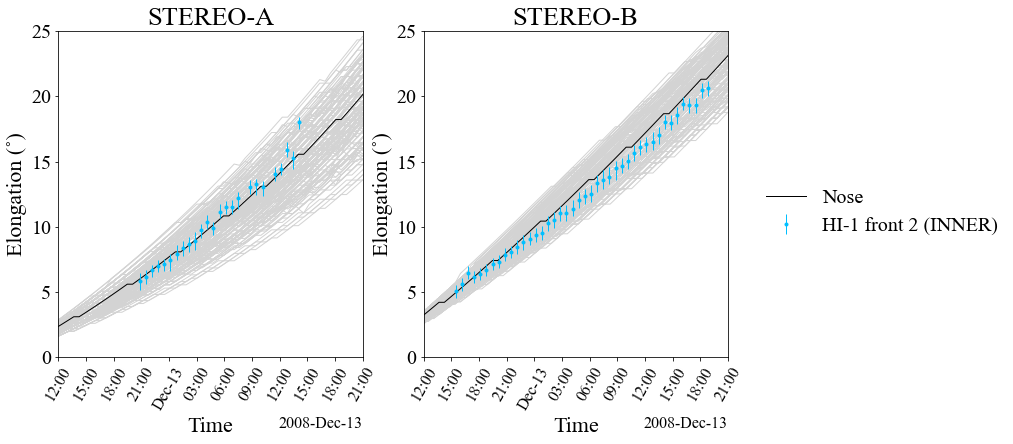

In [127]:
feature_list = ['initial flank', 'nose']
for i in range(2):
    ensemble_elongation_plot('HI1',feature_list[i], n_ens = N, save=False, tag=TAG)                                                                               

#### Look at the members identified as the "best fit" run

* Dataframe 1: Best fit members to the time-elogation profiles of the flank, nose, and nose and flank from STEREO-A
* Dataframe 2: Best fit members to the time-elogation profiles of the flank, nose, and nose and flank from STEREO-B
* Dataframe 3: Best fit members to the time-elogation profiles of the nose and flank from both STEREO spacecraft, and the model member with best arrival time and arrival speed at L1
* Dataframe 4: The cone CME inital parameters in the model runs idenfitied as "best fit" in the above dataframes. 

In [143]:
best_fit_runs(inner_boundary_r, ETplot=False, tag=TAG)

Best Fit Run STEREO-A,Feature,Total Minimum Error,RMSE Minimum Error,File arg.,Arrival Time,Arrival Time (iso),Arrival Speed
0,flank,2.545936,0.273643,186,2454816.91088587,2008-12-16 09:51:40.539,330.750212
1,nose,5.363246,0.463174,51,2454816.729786266,2008-12-16 05:30:53.533,319.551655
2,N & F,10.900937,0.429839,18,2454816.8565343074,2008-12-16 08:33:24.564,325.084688


Best Fit Run STEREO-B,Feature,Total Minimum Error,RMSE Minimum Error,File arg.,Arrival Time,Arrival Time (iso),Arrival Speed
0,flank,14.007749,0.623782,37,2454816.7780987658,2008-12-16 06:40:27.733,320.933421
1,nose,3.115638,0.272363,12,2454817.0014718072,2008-12-16 12:02:07.164,349.354233
2,N & F,26.468672,0.582531,38,2454816.9048468075,2008-12-16 09:42:58.764,330.014494


Best Fit Run BOTH,Feature,Total Minimum Error,RMSE Minimum Error,File arg.,Arrival Time,Arrival Speed
0,Both Spacecrafts,45.578285,0.576791,171,2008-12-16 08:24:49.033,324.649094
1,arrival time,656.735836,NaN,"[35, 45, 109, 130, 185]",NaN,NaN
2,arrival speed,0.100065,NaN,"[0, 75, 76, 80, 162, 173]",NaN,NaN


,Ensemble Run,Initial Radial Height (Rs),Latitude (˚),Longitude (˚),Speed (km/s),Thickness (Rs),Time of launch,Width (˚)
186,ensemble_185,30.0,5.850949,16.376672,762.653769,15.703966,0.0 s,37.557631
51,ensemble_50,30.0,8.495869,11.391173,750.996826,19.305367,0.0 s,43.818094
18,ensemble_17,30.0,11.244442,10.778775,641.789858,17.164802,0.0 s,47.863908
37,ensemble_36,30.0,10.982428,3.668542,662.722039,18.969035,0.0 s,47.359681
12,ensemble_11,30.0,6.482398,10.329947,513.438008,20.533493,0.0 s,43.865520
38,ensemble_37,30.0,7.350890,2.018821,738.462835,13.682094,0.0 s,31.642239
171,ensemble_170,30.0,6.019337,5.687061,584.422518,20.853791,0.0 s,44.160514
35,ensemble_34,30.0,10.541857,8.203539,752.450385,17.854667,0.0 s,39.870585
45,ensemble_44,30.0,12.534546,3.599127,771.723530,14.488782,0.0 s,49.928128
109,ensemble_108,30.0,10.166901,10.423719,791.099513,17.118552,0.0 s,39.739842


***
# Figures for the paper

Here, previous figures are reformatted for the paper. 

### Time-elongation plot: Merge 
* Merge time-elongation plots. a) the HI observations, b) the ensemble time-elongation profiles, and c) the "best fit" modelled time-elongation profile

In [92]:
def ensemble_elongation_plot_fig(FOV, n_ens = 100, best_index='deterministic', save=False, tag=''):
    """
    Produces figure showing time-elongation plots. This is a combination of functions stated in this document to produce a
    single figure for a paper. Now top row shoes the HI observations, middle row shows the ensemble profiles overlaid with 
    HI observations, and the bottom row shows the time-elongation profile of a specified member index (varibale: best_index)
    
    Params:
    ---------
    FOV: Either "HI1" or "HI2"
    n_ens: Number of ensemble memebers.
    best_index: the index value of the ensemble member which is shown in the bottom row.
    save: False. Saves figure to HUXt>figures.
    tag: Tag names of files, used to locate local files to read into the script.
   
    Returns:
    ---------
    Figure: Single figure of 2x3 suplots of elongation-time profiles.
    
    """
    
    project_dirs = H._setup_dirs_()
    
    # LOAD DATA
    #===========
    
    # Load Ensemble Data
    ens_profileA, ens_profileB = load_csv_file(file = "elongation profiles", tag=tag)
    
    # Load Best Run Data
    if best_index == 'deterministic':
        path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
    else:
        path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_ensemble_{}*.hdf5".format(tag,best_index-1))
    ensemble_run = glob.glob(path)[0]
    model, cme_list = H.load_HUXt_run(ensemble_run)
    cme = cme_list[0]
    sta_profile, stb_profile = huxt_t_e_profile_fast(cme)

    #----------------------
    
    # Identify plotting limits using ther deterministic run
    #===========
    
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(ens_profileA)):
            if ens_profileA.el_n_deter[i] < 30:    # this run is equal to the huxta output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_a = i
            if ens_profileB.el_n_deter[i] < 30:    # this run is equal to the huxtb output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(ens_profileA.el)
        FOVlimit_a = len(ens_profileA)
        FOVlimit_b = len(ens_profileB)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
        
    # Format Time
#     HItimeA = Time(HItimeA).datetime
    time_a = Time(ens_profileA.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(ens_profileB.time, format = 'jd').datetime[0:FOVlimit_b]
    
    #----------------------
    # Figure
    #===========
    
    # Format Figure
    plt.rcParams.update({'font.size': 22, 'axes.labelsize':22, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})
    fig, ((ax1a, ax1b),(ax2a,ax2b),(ax3a,ax3b)) = plt.subplots(3, 2, figsize = [9,20])
    plt.subplots_adjust(wspace=0.2, hspace=0.1)
    
    ax = [ax1a, ax1b,ax2a,ax2b,ax3a,ax3b]
    axislist = ["ax1a", "ax1b","ax2a","ax2b","ax3a","ax3b"]
    for nn,axs in enumerate(ax):
        axs.yaxis.set_major_locator(MultipleLocator(5))
        axs.yaxis.set_minor_locator(MultipleLocator(1))

        axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m/%d'))
        axs.xaxis.set_major_locator(mdates.HourLocator(interval=12))
        axs.xaxis.set_minor_locator(mdates.HourLocator(interval=3))
        
        axs.set_ylim(bottom=0, top=ymax) 
        axs.set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,Time('2008-12-13T21:00:00', format='isot').datetime)
        
        # If left column
        if str(axislist[nn])[3]=='a':
            axs.set_ylabel('Elongation (˚)')
            
            axs.tick_params(axis= 'y', which='major', direction="inout", width=2, length=7)
            axs.tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
            axs.tick_params(axis= 'y', which='minor', direction="inout", width=1, length=2)
            axs.tick_params(axis= 'x', which='minor', direction="out", width=1, length=2)
        
        # If right column
        else:
            axs.tick_params(axis= 'y', which='major', direction="in", width=2, length=7)
            axs.tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
            axs.tick_params(axis= 'y', which='minor', direction="in", width=1, length=2)
            axs.tick_params(axis= 'x', which='minor', direction="out", width=1, length=2)
    
        if str(axislist[nn])[2]!='3':
            axs.set_xticks([])
            
    ax1a.set_title('STEREO-A')
    ax1b.set_title('STEREO-B')
    ax3a.set_xlabel('Time')
    ax3b.set_xlabel('Time')
 
    plt.setp(ax1b.get_yticklabels(), visible=False)
    plt.setp(ax2b.get_yticklabels(), visible=False)
    plt.setp(ax3b.get_yticklabels(), visible=False)
    

    
    
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.3, hspace=0.1, wspace=0.0)
    
    #---------------
    # Plot Figure
    
    # PLOT ROW 1: HI Elongation Profile
    ax1a.errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']), fmt='.', lw=1, color='red', alpha=0.7, label='HI-1 front 1')
    ax1a.errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.', lw=1, color='blue', alpha=0.7,  label='HI-1 front 2')

    ax1b.errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.', lw=1, color='red', alpha=0.7,  label='HI-1 front 1 (OUTER)')
    ax1b.errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']), fmt='.', lw=1, color='blue', alpha=0.7,  label='HI-1 front 2 (INNER)')

    
    # PLOT ROW 2: Ensemble plot
    for i in range(n_ens):
        yaxisplot_flank = "el_{:02d}".format(i)
        yaxisplot_nose = "el_n_{:02d}".format(i)
        ax2a.plot(time_a, ens_profileA[yaxisplot_flank][0:FOVlimit_a], 'lightpink', linewidth=1, zorder=0, alpha=0.2)
        ax2a.plot(time_a, ens_profileA[yaxisplot_nose][0:FOVlimit_a], 'lightskyblue', linewidth=1, zorder=0, alpha=0.2)
        ax2b.plot(time_b, ens_profileB[yaxisplot_flank][0:FOVlimit_b], 'lightpink', linewidth=1, zorder=0, alpha=0.2)
        ax2b.plot(time_b, ens_profileB[yaxisplot_nose][0:FOVlimit_b], 'lightskyblue', linewidth=1, zorder=0, alpha=0.2)
        
    ax2a.errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),fmt='.', color='red', label='HI-1 front 1', linewidth=1, zorder=5)  
    ax2a.errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.', color='blue', label='HI-1 front 2', linewidth=1, zorder=5)
    ax2b.errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.', color='red', label='HI-1 front 1 (OUTER)', linewidth=1, zorder=5)
    ax2b.errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),fmt='.', color='blue', label='HI-1 front 2 (INNER)', linewidth=1, zorder=5) 
        

    # PLOT ROW 3: Best Ensemble Run

    ax3a.errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']), fmt='.', lw=1, color='red', alpha=0.7,  label='HI-1 front 1')
    ax3a.errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.', lw=1, color='blue', alpha=0.7,  label='HI-1 front 2')
    ax3a.plot(time_a, sta_profile.el[0:FOVlimit_a],'k', label='Initial Flank', lw=2)
    ax3a.plot(time_a, sta_profile.el_n[0:FOVlimit_a], 'k--', label='Nose', lw=2)
    
    ax3b.errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.', lw=1, color='red', alpha=0.7,  label='HI-1 front 1 (OUTER)')
    ax3b.errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']), fmt='.', lw=1, color='blue', alpha=0.7,  label='HI-1 front 2 (INNER)')
    ax3b.plot(time_b, stb_profile.el[0:FOVlimit_b], 'k', label='Initial Flank', lw=2)
    ax3b.plot(time_b, stb_profile.el_n[0:FOVlimit_b], 'k--', label='Nose', lw=2)
    
    ax1a.annotate("a)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=20)
    ax2a.annotate("b)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=20)
    ax3a.annotate("c)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=20)
        
    if save:
        filename = "HUXt_CR2077_{}_{}_elongation_profile_fig.png".format(tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        
        filename = "HUXt_CR2077_{}_{}_elongation_profile_fig.pdf".format(tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        
    return

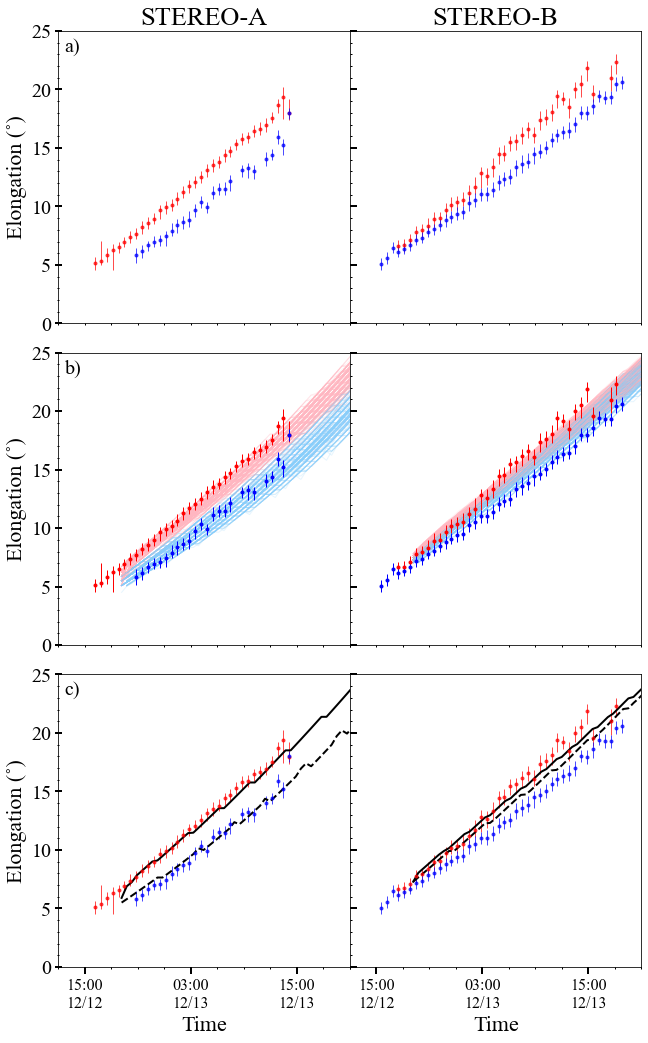

In [129]:
# The best_fit member for the '12Dec08_n=200_r=30_PS=1' ensemble was 199.
# Best fit =  model with lowest RMSE for all features.

ensemble_elongation_plot_fig('HI1', n_ens = 200, best_index=199 , save=True, tag='12Dec08_n=200_r=30_PS=1')

### Plane plot with ghost-front indication
A plane plot for a specific time can be made in the following function. This function differes from earlier functions because:
* By using this, the HI1 field of view from the spacecraft is projected on the plane. 
* The line of sight of the flank and nose is shown.

In [132]:
def animation_frame(time, model, hxt_sta, hxt_stb, sta, stb):
    """
    Make a contour plot on polar axis of the solar wind solution at a specific time. 
    The HI1 field of view is projected on the plane form each spacecraft observer. 
    The line of sight to the nose and flank is indicated as well. 
    
    Parameters
    ----------
    ssw_event: String identifier of the SWPC event being analysed. Should be ssw_007, ssw_008, ssw_009, ssw_012.
    time: Time to look up closet model time to (with an astropy.unit of time).
    model: An instance of the HUXt class with a model solution.
    hxt_sta: Pandas dataframe of the ConeCME flank profile from HUXt for STEREO-A.
    hxt_stb: Pandas dataframe of the ConeCME flank profile from HUXt for STEREO-B.
    sta_hxt_pa: Float value of the position angle of the ConeCME in the STEREO-A field of view.
    stb_hxt_pa: Float value of the position angle of the ConeCME in the STEREO-B field of view.
    sta: A HUXt.Observer object for STEREO-A for this event.
    stb: A HUXt.Observer object for STEREO-B for this event.
    Returns
    -------
    fig: Figure handle.
    ax: List of the three Axes handles.
    """
    # Load in the deterministic HUXt solution, SSW data, and HI images.
    project_dirs = H._setup_dirs_()
    
    id_time_out = np.argmin(np.abs(model.time_out - time))
    time_out = model.time_init + model.time_out[id_time_out] + (2*u.d)
    
    fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={"projection": "polar"})
    
    if (time < model.time_out.min()) | (time > (model.time_out.max())):
        print("Error, input time outside span of model times. Defaulting to closest time")
    
    id_t = np.argmin(np.abs(model.time_out - time))
    
    # Get plotting data
    lon = model.lon_grid.value.copy()
    rad = model.r_grid.value.copy()
    v = model.v_grid_cme.value[id_t, :, :].copy()
    
    # Pad out to fill the full 2pi of contouring
    pad = lon[:, 0].reshape((lon.shape[0], 1)) + model.twopi
    lon = np.concatenate((lon, pad), axis=1)
    pad = rad[:, 0].reshape((rad.shape[0], 1))
    rad = np.concatenate((rad, pad), axis=1)
    pad = v[:, 0].reshape((v.shape[0], 1))
    v = np.concatenate((v, pad), axis=1)
    
    mymap = mpl.cm.viridis
    mymap.set_over('lightgrey')
    mymap.set_under([0, 0, 0])
    dv = 10
    levels = np.arange(200, 800+dv, dv)
    
    cnt = ax.contourf(lon, rad, v, levels=levels, cmap=mymap, extend='both')
    
    # Add on CME boundaries
    cme = model.cmes[0]
    ax.plot(cme.coords[id_t]['lon'], cme.coords[id_t]['r'], '-', color='darkorange', linewidth=3, zorder=3)
    
    for body, style in zip(['EARTH', 'VENUS', 'MERCURY', 'STA', 'STB'], ['co', 'mo', 'ko', 'rs', 'y^']):
        obs = model.get_observer(body)
        if body != 'STB':
            ax.plot(obs.lon[id_t], obs.r[id_t], style, markersize=16, label=body)
        elif body == 'STB':
            ax.plot(obs.lon[id_t], obs.r[id_t], '^', color='fuchsia', markersize=16, label=body)
    
    
    #####################################################
    # Add on HI1A FOV, 4 to 25 
    rsa = np.mean(sta.r)
    lsa = np.mean(sta.lon)
    xsa = rsa * np.cos(lsa)
    ysa = rsa * np.sin(lsa)
    
    rsb = np.mean(stb.r)
    lsb = np.mean(stb.lon)
    xsb = rsb * np.cos(lsb)
    ysb = rsb * np.sin(lsb)
    
    sta_patch = [[lsa.value, rsa.value]]
    stb_patch = [[lsb.value, rsb.value]]
    
    # Get plane of sky coord of elon lims
    for el in [4.0, 24.0]:
        # STA
        rp = rsa * np.tan(el*u.deg)
        lp = lsa - 90*u.deg
        
        xp = rp * np.cos(lp)
        yp = rp * np.sin(lp)
        grad = (yp - ysa) / (xp - xsa)
        c = ysa - grad*xsa
        xf = -250 * u.solRad               # -250 because the viewpoint will extent to behind the Sun
        yf = grad*xf + c
        rf = np.sqrt(xf**2 + yf**2)
        lf = np.arctan2(yf, xf)
        sta_patch.append([lf.value, rf.value])
        
        # STB
        rp = rsb * np.tan(el*u.deg)
        lp = lsb + 90*u.deg
        
        xp = rp * np.cos(lp)
        yp = rp * np.sin(lp)
        grad = (yp - ysb) / (xp - xsb)
        c = ysb - grad*xsb
        xf = -250 * u.solRad
        yf = grad*xf + c
        rf = np.sqrt(xf**2 + yf**2)
        lf = np.arctan2(yf, xf)
        stb_patch.append([lf.value, rf.value])
    
    # commented out as a temp fix to remove HI view shadow
    sta_patch = mpl.patches.Polygon(np.array(sta_patch), color='r', alpha=0.15, zorder=1)
    ax.add_patch(sta_patch)
    stb_patch = mpl.patches.Polygon(np.array(stb_patch), color='fuchsia', alpha=0.15, zorder=1)
    ax.add_patch(stb_patch)
    
    # Add on the flanks.
    id_t = np.argmin(np.abs(model.time_out - time))
    ax.plot([lsa.value, sta_profile.loc[id_t, 'lon']], [rsa.value, sta_profile.loc[id_t, 'r']], 'r-', linewidth=2)
    ax.plot(sta_profile.loc[id_t,'lon'], sta_profile.loc[id_t,'r'], 'rX', markersize=10, zorder=4)
    ax.plot([lsb.value, stb_profile.loc[id_t, 'lon']], [rsb.value, stb_profile.loc[id_t, 'r']], '-', color='r', linewidth=2)
    ax.plot(stb_profile.loc[id_t, 'lon'], stb_profile.loc[id_t, 'r'], 'd', color='r', markersize=10, zorder=4)
    
    # Add on the nose
    ax.plot([lsa.value, sta_profile.loc[id_t, 'lon_n']], [rsa.value, sta_profile.loc[id_t, 'r_n']], 'b-', linewidth=2)
    ax.plot(sta_profile.loc[id_t,'lon_n'], sta_profile.loc[id_t,'r_n'], 'bX', markersize=10, zorder=4)
    ax.plot([lsb.value, stb_profile.loc[id_t, 'lon_n']], [rsb.value, stb_profile.loc[id_t, 'r_n']], '-', color='c', linewidth=2)
    ax.plot(stb_profile.loc[id_t, 'lon_n'], stb_profile.loc[id_t, 'r_n'], 'd', color='c', markersize=10, zorder=4)

    ####################################################
    
    # Add on a legend.
    fig.legend(ncol=5, loc='center', bbox_to_anchor=(0.5, 0.025), frameon=False, handletextpad=0.2, columnspacing=1.0, fontsize=22)
    
    ax.set_ylim(0, 240)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.patch.set_facecolor('slategrey')
    fig.subplots_adjust(left=0.0, bottom=0.15, right=0.99, top=0.99, wspace=-0.12)
   
    # Add color bar
    pos = ax.get_position()
    dw = 0.005
    dh = 0.045
    left = pos.x0 + dw
    bottom = pos.y0 - dh
    wid = pos.width - 2*dw
    cbaxes = fig.add_axes([left, bottom, wid, 0.03])
    cbar1 = fig.colorbar(cnt, cax=cbaxes, orientation='horizontal')
    cbar1.set_label("Solar Wind Speed (km/s)", size=26)
    cbar1.set_ticks(np.arange(200, 900, 100))
    cbar1.ax.tick_params(labelsize=26)
    
    # Add label
    label = (model.time_init + model.time_out[id_t]).strftime("%Y-%m-%dT%H:%M")
    fig.text(0.75, pos.y0, label, fontsize=22)

    return fig, [ax]



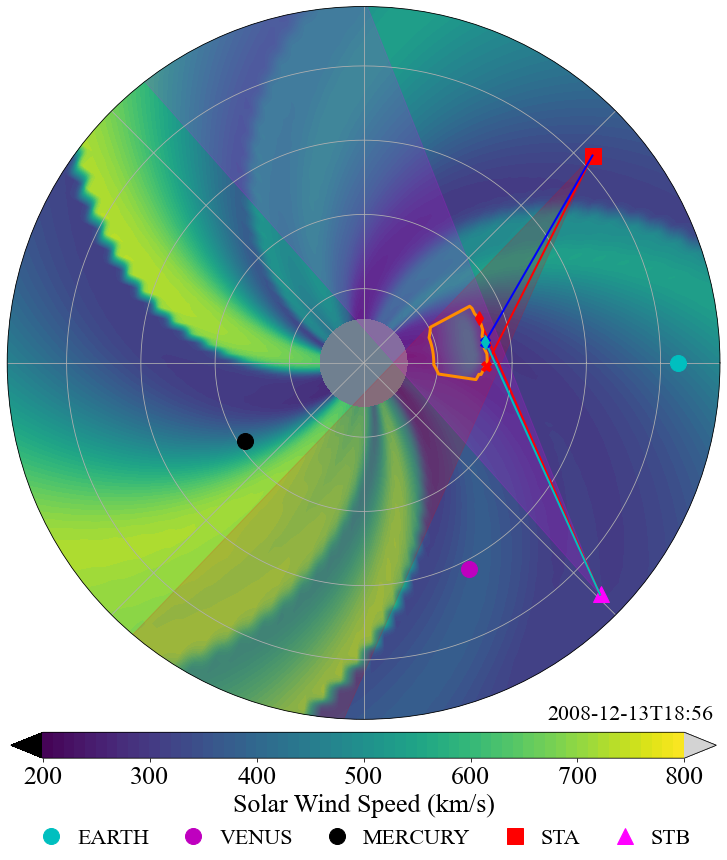

In [136]:
# This function does not recall any saved HUXt run from the directory. Run a single model run (e.g.determinsitc) above so the 'cme' variable is defined. Then run this function. 

sta_profile,stb_profile = huxt_t_e_profile_fast(cme)

frametime = 24
tag='12Dec08_MAS-HUXt'
times = model.time_init + model.time_out
sta = H.Observer('STA', times)
stb = H.Observer('STB', times)
fig, ax = animation_frame(frametime*u.hour, model, sta_profile, stb_profile, sta, stb)

filename = "HUXt_CR{:03d}_{}_{}hours_eclipticplane.png".format(cr_num, tag, frametime)
filepath = os.path.join(model._figure_dir_, filename)            
fig.savefig(filepath, dpi=300, bbox_inches='tight')

### Solar Wind Speed Comparison to insitu L1 ####

* For comarison of HUXt data at L1, ACE data is imported from \code file. Using estimated arrival time, the in-situ bulk flow speed is returned. The arrival time and speed at Earth is also estimated.

In [22]:
# Load in ACE observation
df_ace = pd.read_csv(r"ACE_SWBulk_201108_171208.csv")
df_ace = df_ace.rename(columns={'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ' : 'time','SW_H_SPEED_km/s':'speed' })
df_ace['time'] = pd.to_datetime(df_ace['time'])

ace_time = Time(df_ace['time'])

# Set observtional arrival of CME at ACE, and the speed at the precise moment.
obs_arrival_time = Time("2008-12-16T07:00:00")
obs_arrival_speed = np.interp(obs_arrival_time.jd,ace_time.jd,df_ace['speed']) * u.km/u.s
print('Using observed TOA, arrival speed is:', obs_arrival_speed)

# # Interp. CME arrival speed based upon model arrival time.
ace_time = Time(df_ace['time'])
# ace_arrival = np.interp(cme.earth_arrival_time.jd,ace_time.jd,df_ace['speed']) * u.km/u.s
# print('Using model TOA, arrival speed is:', ace_arrival)


# the impact of ACE's distance from Earth.
aedis = 1500000 * u.km
aspeed = obs_arrival_speed
#ACE - Earth distance / Speed of CME at ACE
aetime = aedis/aspeed
earth_arrival_time = obs_arrival_time + TimeDelta(aetime)
print("ACE to Earth time:", "%.2f" %aetime.to_value('h'),'hours')
print("TOA of CME at Earth:", earth_arrival_time.iso)


Using observed TOA, arrival speed is: 333.43 km / s
ACE to Earth time: 1.25 hours
TOA of CME at Earth: 2008-12-16 08:14:58.695


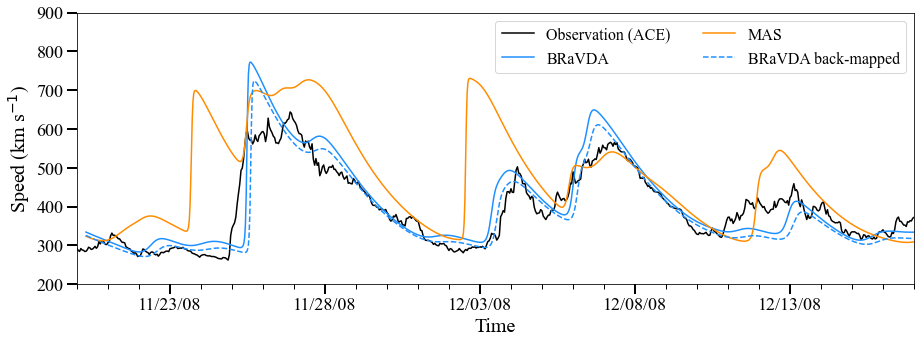

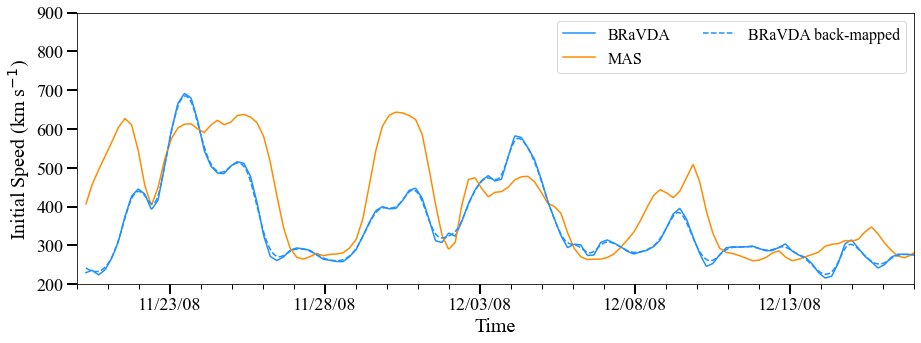

In [54]:
#PLOT THE ACE DATA. 
# 1) overlay the L1 data from ACE, BRaVDA-HUXt and MAS-HUXt. BRaVDA-HUXt backmapped is also shown here.
# 2) show the solar wind speed on the model plane at 30Rs.


# Formate ACE data
dface = pd.DataFrame()
dface = df_ace[df_ace.speed > 0]               # get rid of invalid data points
dface['time'] = Time(dface['time']).datetime


launch = (Time("2008-12-12 19:00:00", format='iso') - Time("2008-11-20 06:56:00", format='iso'))

#-----------------------
# load BRaVDA deterministic model run
model = H.HUXt(v_boundary=v_boundary, cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4)
cme = H.ConeCME(t_launch=launch.value*u.day, latitude = 9.0*u.deg, longitude=10.0*u.deg, width=42*u.deg, v=497*(u.km/u.s), thickness=5*u.solRad)
cme_list=[cme]
model.solve(cme_list)

# Format data for plotting
time_mod = model.time_init + model.time_out
time_mod = time_mod.datetime

id_r = np.argmin(np.abs(model.r - 1*u.au))
id_lon = np.argmin(np.abs(model.lon - 0.0*u.deg))

#-----------------------
# load HelioMAS deterministic model run
modelMAS = H.HUXt(cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4)
modelMAS.solve(cme_list)

# Format data for plotting
time_mod_mas = modelMAS.time_init + modelMAS.time_out
time_mod_mas = time_mod_mas.datetime

id_r_mas = np.argmin(np.abs(modelMAS.r - 1*u.au))
id_lon_mas = np.argmin(np.abs(modelMAS.lon - 0.0*u.deg))

#-----------------------
# load BRaVDA backmapping deterministic model run
launchI = (Time("2008-12-12 10:30:00", format='iso') - Time("2008-11-20 06:56:00", format='iso'))
v_inner = H.map_v_boundary_inwards(v_boundary, 30*u.solRad, 8*u.solRad)
modelI = H.HUXt(v_boundary=v_inner, cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4, r_min = 8*u.solRad)
cmeI = H.ConeCME(t_launch=launchI.value*u.day, latitude = 9.0*u.deg, longitude=10.0*u.deg, width=42*u.deg, v=600*(u.km/u.s), thickness=16.9*u.solRad)
cme_listI=[cmeI]
modelI.solve(cme_listI)

# Format data for plotting
time_modI = modelI.time_init + modelI.time_out
time_modI = time_modI.datetime

id_rI = np.argmin(np.abs(modelI.r - 1*u.au))
id_lonI = np.argmin(np.abs(modelI.lon - 0.0*u.deg))


# PLOTTING

plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':16, 'xtick.labelsize': 18.0, 'ytick.labelsize': 18.0, "font.family":"Times New Roman"})

fig,ax = plt.subplots(figsize = [15,5])

ax.plot(dface.time, dface.speed, 'k', label='Observation (ACE)')
ax.plot(time_mod, model.v_grid_amb[:,id_r,id_lon],'dodgerblue', label='BRaVDA')
ax.plot(time_mod_mas, modelMAS.v_grid_amb[:,id_r_mas,id_lon_mas],'darkorange', label='MAS')
ax.plot(time_modI, modelI.v_grid_amb[:,id_rI,id_lonI],'--',color='dodgerblue', label='BRaVDA back-mapped')

ax.set_xlabel('Time')
ax.set_xlim(dface.time.min(),dface.time.max())
ax.set_ylabel('Speed (km s$^{-1}$)')
ax.set_ylim(bottom=200, top=900)
ax.legend(loc='best', ncol=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax.tick_params(axis= 'y', which='major', direction="out", width=2, length=10)
ax.tick_params(axis= 'x', which='major', direction="out", width=2, length=10)
ax.tick_params(axis= 'y', which='minor', direction="out", width=1, length=5)
ax.tick_params(axis= 'x', which='minor', direction="out", width=1, length=5)


cr_num = np.int32(model.cr_num.value)
# filename = "HUXt_CR{:03d}_SWSchemeComparison.pdf".format(cr_num)
# filepath = os.path.join(model._figure_dir_, filename)            
# plt.savefig(filepath, dpi=150, bbox_inches='tight')
filename = "HUXt_CR{:03d}_SWSchemeComparison.png".format(cr_num)
filepath = os.path.join(model._figure_dir_, filename)            
plt.savefig(filepath, dpi=150, bbox_inches='tight')

#----- 30Rs SOLAR WIND SPEED -----

id_r = np.argmin(np.abs(model.r - 30*u.solRad))
id_lon = np.argmin(np.abs(model.lon - 0.0*u.deg))

id_r_mas = np.argmin(np.abs(modelMAS.r - 30*u.solRad))
id_lon_mas = np.argmin(np.abs(modelMAS.lon - 0.0*u.deg))

id_rI = np.argmin(np.abs(modelI.r - 30*u.solRad))
id_lonI = np.argmin(np.abs(modelI.lon - 0.0*u.deg))


fig,ax = plt.subplots(figsize = [15,5])

ax.plot(time_mod, model.v_grid_amb[:,id_r,id_lon],'dodgerblue', label='BRaVDA')
ax.plot(time_mod_mas, modelMAS.v_grid_amb[:,id_r_mas,id_lon_mas],'darkorange', label='MAS')
ax.plot(time_modI, modelI.v_grid_amb[:,id_rI,id_lonI],'--',color='dodgerblue', label='BRaVDA back-mapped')

ax.set_xlabel('Time')
ax.set_xlim(dface.time.min(),dface.time.max())
ax.set_ylabel('Initial Speed (km s$^{-1}$)')
ax.set_ylim(bottom=200, top=900)
ax.legend(loc='best', ncol=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax.tick_params(axis= 'y', which='major', direction="out", width=2, length=10)
ax.tick_params(axis= 'x', which='major', direction="out", width=2, length=10)
ax.tick_params(axis= 'y', which='minor', direction="out", width=1, length=5)
ax.tick_params(axis= 'x', which='minor', direction="out", width=1, length=5)